#PZSIB 5 - Data Analytics
## Syntax Code Assessment 3
Nama: A'idah Eka Septiana

# 1. SQL Database Setup and Queries.

##1.1 Database: SQL Query I

### 1.1.1. Import the downloaded dataset into a SQL database.

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_image(path_to_image, width=None, height=None):

    mime_type = None
    path_to_image = path_to_image.lower()

    # More MIME types:
    # https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types
    if path_to_image.endswith('.jpg') or path_to_image.endswith('.jpeg'):
        mime_type = 'image/jpeg'
    elif path_to_image.endswith('.png'):
        mime_type = 'image/png'
    elif path_to_image.endswith('.gif'):
        mime_type = 'image/gif'
    else:
        raise ValueError('Unknown extension: %s' % (path_to_image))

    img = open(path_to_image, 'rb').read()
    data_url = 'data:image/jpeg;base64,' + b64encode(img).decode()

    width_str = "width='%d'" % (width) if width is not None else ''
    height_str = "height='%d'" % (width) if height is not None else ''

    display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))

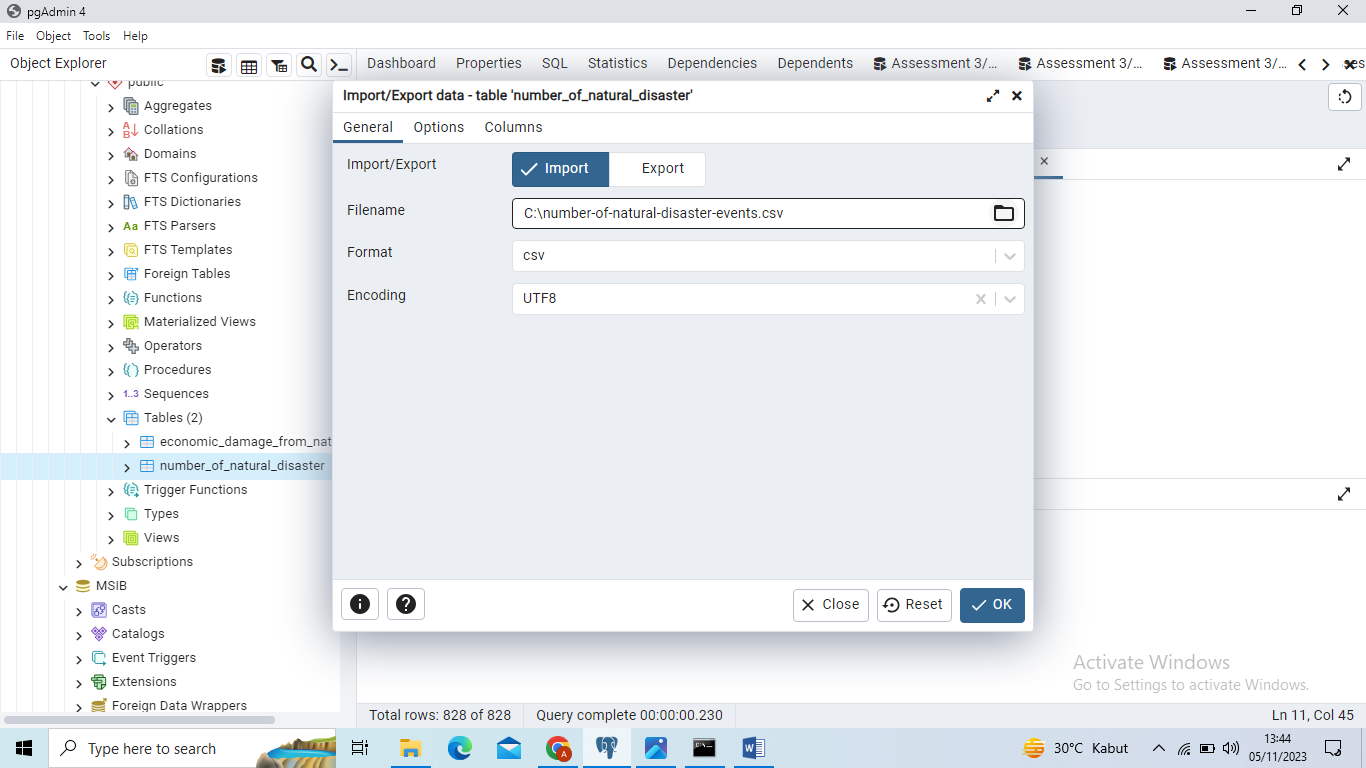

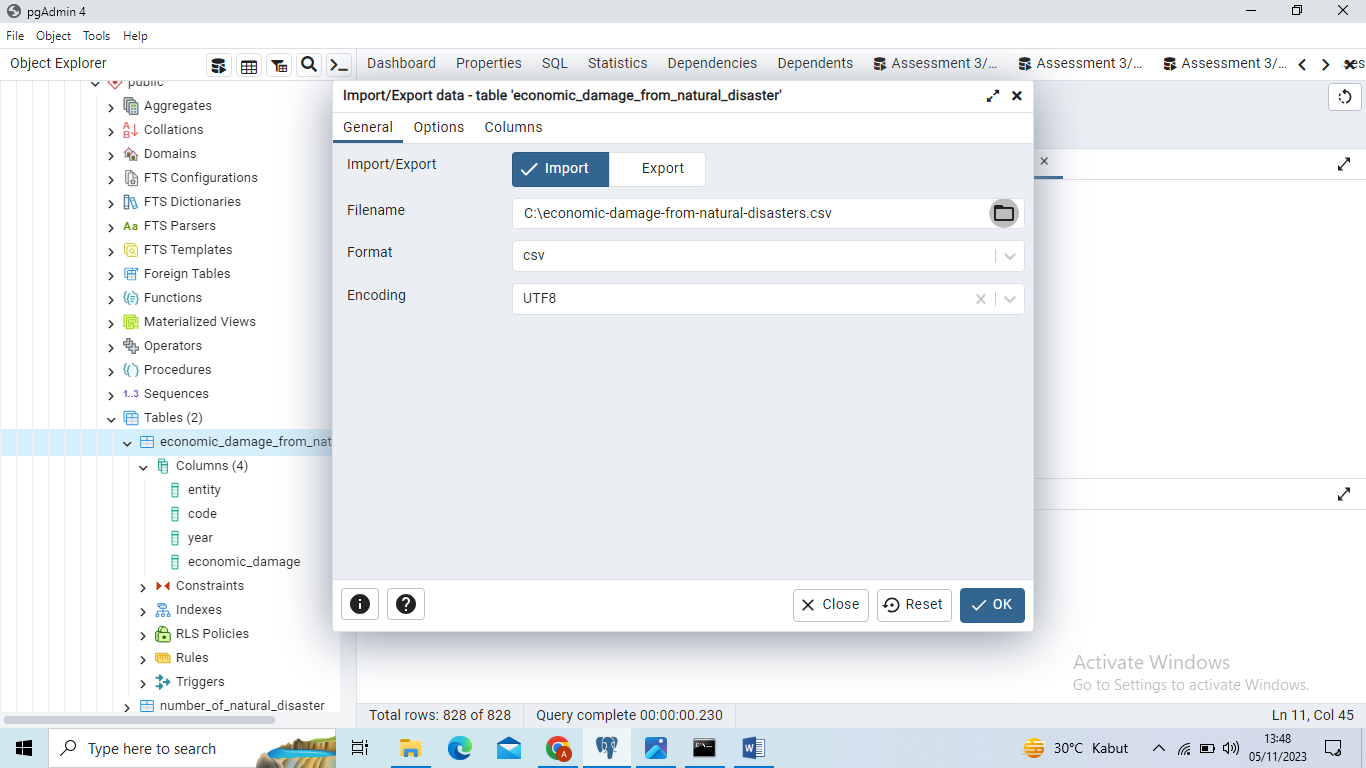

In [ ]:
# Menampilkan Gambar Import dataset, yang ada di File dalam Notebook
from IPython.display import Image, display
display(Image('C:/Users/User/Pictures/Screenshots/import1.png', width=1000))
display(Image('C:/Users/User/Pictures/Screenshots/import2.png', width=1000))

### 1.1.2. Write an SQL query to fetch `Year` and any relevant variables (e.g., `Number of natural disasters`, `Economic damage`).

In [ ]:
#!pip install psycopg2

In [ ]:
#!pip install psycopg2-binary

In [ ]:
# Import Module
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sqlalchemy import text

# Membuat Koneksi URL
url = URL.create(
    drivername="postgresql",
    username="postgres",
    host="localhost",
    database="Assessment 3",
    password="p@ssword"
)

# Membuat engine untuk menjalankan query SQL dan berinteraksi dengan database
engine = create_engine(url)

# Membuka Koneksi ke Database
conn = engine.connect()

In [ ]:
conn.rollback()

Setelah di import, terdapat tabel dari dataset number_of_natural_disaster yang berisi data seperti di bawah ini:

In [ ]:

# Menjalankan Query SQL memanggil dataset number_of_natural_disaster
my_query = '''
  SELECT *
  FROM public.number_of_natural_disaster
'''

df = pd.read_sql_query(text(my_query), conn)
df.head()

entity  code  year  reported_disaster
0  All natural disasters  None  1900                5.0
1  All natural disasters  None  1901                2.0
2  All natural disasters  None  1902                9.0
3  All natural disasters  None  1903                8.0
4  All natural disasters  None  1904                2.0

dan terdapat tabel dari dataset economic_damage_from_natural_disaster yang berisi data seperti di bawah ini:

In [ ]:
# Menjalankan Query SQL memanggil dataset economic_damage_from_natural_disaster
my_query = '''
  SELECT *
  FROM public.economic_damage_from_natural_disaster
'''

df = pd.read_sql_query(text(my_query), conn)
df.head()

entity  code  year  economic_damage   year_date
0  All natural disasters  None  1900       30000000.0  1900-01-01
1  All natural disasters  None  1901              0.0  1901-01-01
2  All natural disasters  None  1902              0.0  1902-01-01
3  All natural disasters  None  1903      480000000.0  1903-01-01
4  All natural disasters  None  1904              0.0  1904-01-01

Kemudian tabel number_of_natural_disaster dan economic_damage_from_natural_disaster digabung, sehingga terdapat output seperti dibawah ini:

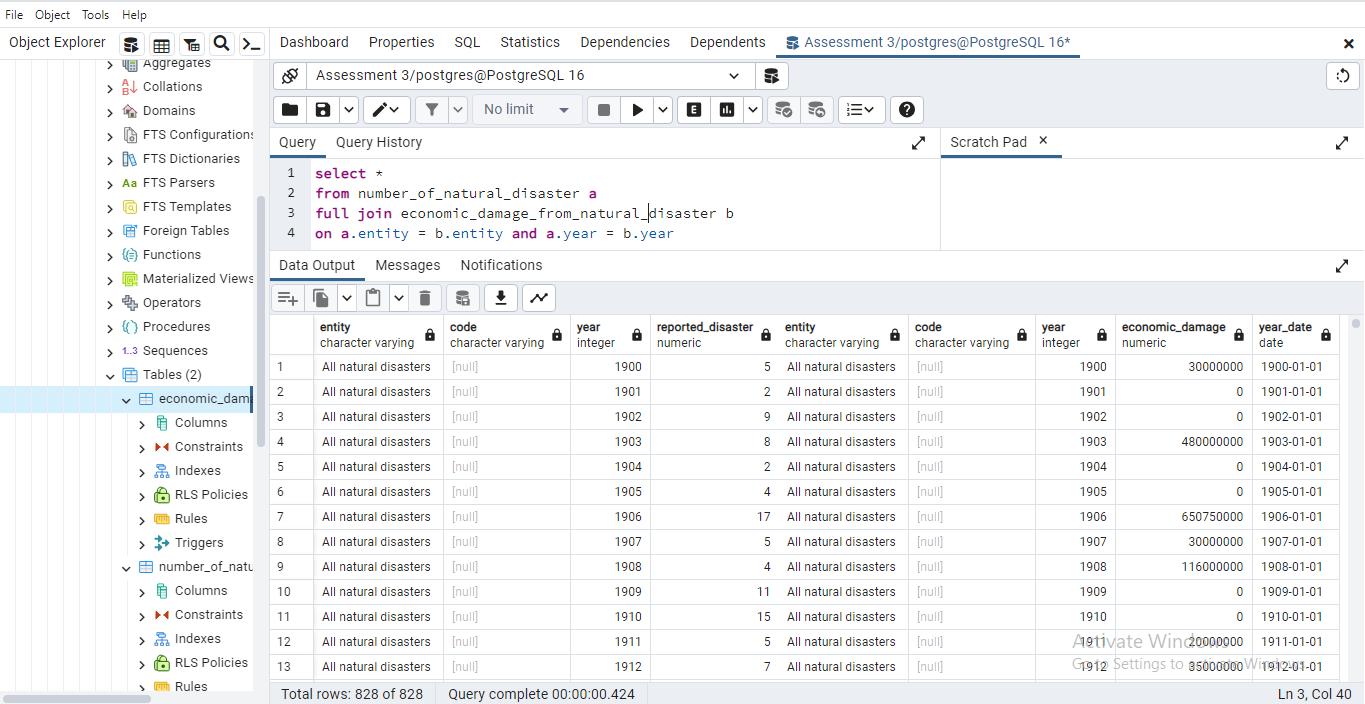

In [ ]:
# Menampilkan Gambar Menggabungkan dataset economic_damage_from_natural_disaster dan number_of_natural_disaster pada Postgres
Image("C:/Users/User/Pictures/Screenshots/joinn.png", width=1000)

Dari tabel di atas, terdapat dataframe yang sama pada dataset number_of_natural_disaster dan economic_damage_from_natural_disaster, oleh karena itu dilakukan full join pada tabel yang sama di kedua dataset.

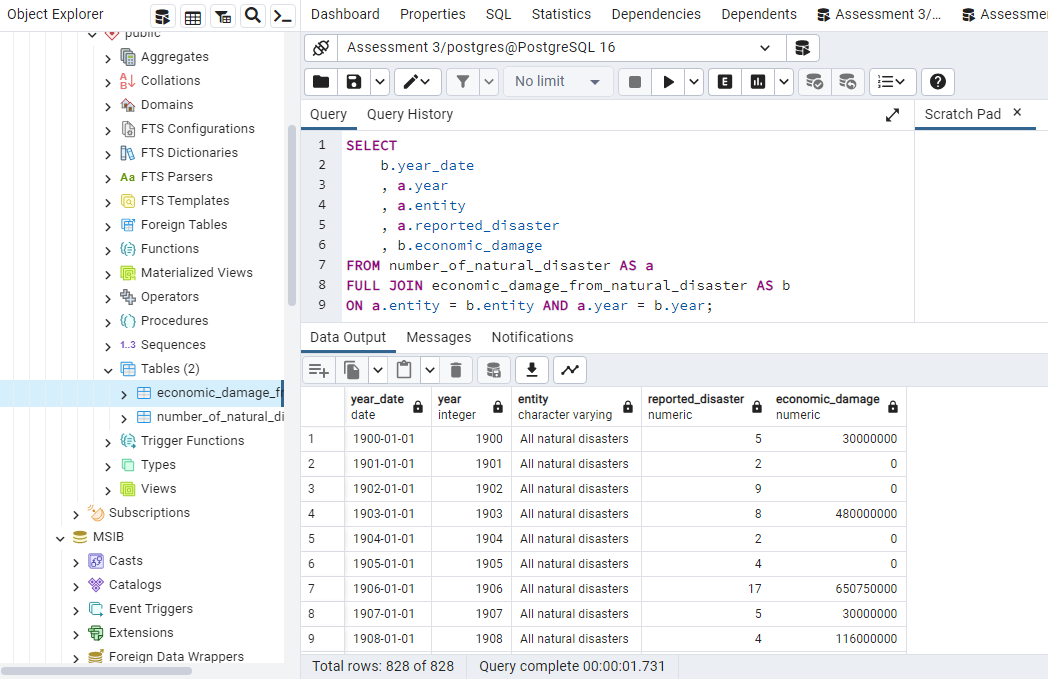

In [ ]:
# Menampilkan Gambar full join memfilter df year dan entit pada dataset dataset economic_damage_from_natural_disaster dan number_of_natural_disaster pada Postgres
Image("C:/Users/User/Pictures/Screenshots/join.png", width=1000)

Query Full join pada pgAdmin di atas jika dijalankan di Google Collab:

In [ ]:
# Menjalankan Query SQL Menggabungkan dataset economic_damage_from_natural_disaster dan number_of_natural_disaster
my_query = '''
  SELECT
    b.year_date,
    a.year,
    a.entity,
    a.reported_disaster,
    b.economic_damage
  FROM number_of_natural_disaster AS a
  FULL JOIN economic_damage_from_natural_disaster AS b
  ON a.entity = b.entity AND a.year = b.year;
'''

df = pd.read_sql_query(text(my_query), conn)
df

year_date  year                 entity  reported_disaster   
0    1900-01-01  1900  All natural disasters                5.0  \
1    1901-01-01  1901  All natural disasters                2.0   
2    1902-01-01  1902  All natural disasters                9.0   
3    1903-01-01  1903  All natural disasters                8.0   
4    1904-01-01  1904  All natural disasters                2.0   
5    1905-01-01  1905  All natural disasters                4.0   
6    1906-01-01  1906  All natural disasters               17.0   
7    1907-01-01  1907  All natural disasters                5.0   
8    1908-01-01  1908  All natural disasters                4.0   
9    1909-01-01  1909  All natural disasters               11.0   
10   1910-01-01  1910  All natural disasters               15.0   
11   1911-01-01  1911  All natural disasters                5.0   
12   1912-01-01  1912  All natural disasters                7.0   
13   1913-01-01  1913  All natural disasters                5.0   
14   1914-01-01  1914  All natural disasters                6.0   
15   1915-01-01  1915  All natural disasters                7.0   
16   1916-01-01  1916  All natural disasters                2.0   
17   1917-01-01  1917  All natural disasters                6.0   
18   1918-01-01  1918  All natural disasters                7.0   
19   1919-01-01  1919  All natural disasters                4.0   
20   1920-01-01  1920  All natural disasters                7.0   
21   1921-01-01  1921  All natural disasters                2.0   
22   1922-01-01  1922  All natural disasters                6.0   
23   1923-01-01  1923  All natural disasters               12.0   
24   1924-01-01  1924  All natural disasters                4.0   
25   1925-01-01  1925  All natural disasters                6.0   
26   1926-01-01  1926  All natural disasters               15.0   
27   1927-01-01  1927  All natural disasters               12.0   
28   1928-01-01  1928  All natural disasters               17.0   
29   1929-01-01  1929  All natural disasters                6.0   
30   1930-01-01  1930  All natural disasters               14.0   
31   1931-01-01  1931  All natural disasters               12.0   
32   1932-01-01  1932  All natural disasters                8.0   
33   1933-01-01  1933  All natural disasters               10.0   
34   1934-01-01  1934  All natural disasters                9.0   
35   1935-01-01  1935  All natural disasters               11.0   
36   1936-01-01  1936  All natural disasters               11.0   
37   1937-01-01  1937  All natural disasters                7.0   
38   1938-01-01  1938  All natural disasters                7.0   
39   1939-01-01  1939  All natural disasters               11.0   
40   1940-01-01  1940  All natural disasters               17.0   
41   1941-01-01  1941  All natural disasters                5.0   
42   1942-01-01  1942  All natural disasters                9.0   
43   1943-01-01  1943  All natural disasters               12.0   
44   1944-01-01  1944  All natural disasters               12.0   
45   1945-01-01  1945  All natural disasters               12.0   
46   1946-01-01  1946  All natural disasters               15.0   
47   1947-01-01  1947  All natural disasters               12.0   
48   1948-01-01  1948  All natural disasters               23.0   
49   1949-01-01  1949  All natural disasters               20.0   
50   1950-01-01  1950  All natural disasters               23.0   
51   1951-01-01  1951  All natural disasters               27.0   
52   1952-01-01  1952  All natural disasters               24.0   
53   1953-01-01  1953  All natural disasters               34.0   
54   1954-01-01  1954  All natural disasters               33.0   
55   1955-01-01  1955  All natural disasters               30.0   
56   1956-01-01  1956  All natural disasters               36.0   
57   1957-01-01  1957  All natural disasters               29.0   
58   1958-01-01  1958  All natural disasters         

Di dapatkan dataset setelah di full join berisi 828 baris dan 4 kolom, ditambah dengan df year_date sehingga menjadi 5 kolom.

## 1.2 Database: SQL Query II

### 1.2.1 Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity)

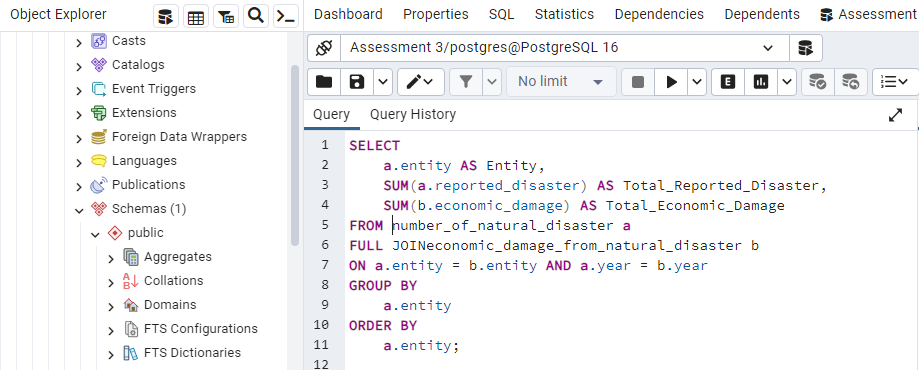

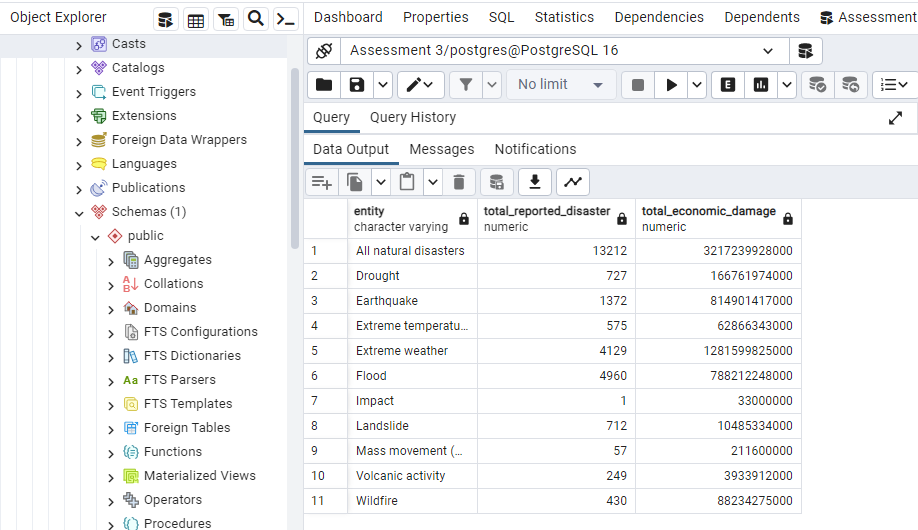

In [ ]:
# Menampilkan Gambar Total Natural Disaster dan Economic Damage Untuk setiap Entity pada Postgres
from IPython.display import Image, display
display(Image('C:/Users/User/Pictures/Screenshots/1.2.1.1.png', width=1000))
display(Image('C:/Users/User/Pictures/Screenshots/1.2.1.2.png', width=1000))

In [ ]:
# Menjalankan Query Total Natural Disaster dan Economic Damage Untuk setiap Entity pada Google Colab
query ='''
SELECT
    a.entity AS Entity,
    SUM(a.reported_disaster) AS Total_Reported_Disaster,
    SUM(b.economic_damage) AS Total_Economic_Damage
FROM number_of_natural_disaster a
FULL JOIN economic_damage_from_natural_disaster b
ON a.entity = b.entity AND a.year = b.year
GROUP BY
    a.entity
ORDER BY
    a.entity;
'''
df = pd.read_sql_query(query, engine)
df

entity  total_reported_disaster  total_economic_damage
0   All natural disasters                  13212.0           3.217240e+12
1                 Drought                    727.0           1.667620e+11
2              Earthquake                   1372.0           8.149014e+11
3     Extreme temperature                    575.0           6.286634e+10
4         Extreme weather                   4129.0           1.281600e+12
5                   Flood                   4960.0           7.882122e+11
6                  Impact                      1.0           3.300000e+07
7               Landslide                    712.0           1.048533e+10
8     Mass movement (dry)                     57.0           2.116000e+08
9       Volcanic activity                    249.0           3.933912e+09
10               Wildfire                    430.0           8.823428e+10

Di dapatkan Total Natural Disaster and Economic Damage untuk setiap data Disaster (Entity):


1.   All natural disasters
      *   Total Natural Disaster: 13212
      *   Total Economic Damage: 3217239928000

2.   Drought
      *   Total Natural Disaster: 727
      *   Total Economic Damage: 166761974000

3.   Earthquake
      *   Total Natural Disaster: 1372
      *   Total Economic Damage: 814901417000

4.   Extreme Temperature
      *   Total Natural Disaster: 575
      *   Total Economic Damage: 62866343000

5.   Extreme Weather
      *   Total Natural Disaster: 4129
      *   Total Economic Damage: 1281599825000

6.   Flood
      *   Total Natural Disaster: 4960
      *   Total Economic Damage: 788212248000

7.   Impact
      *   Total Natural Disaster: 1
      *   Total Economic Damage: 33000000

8.   Landslide
      *   Total Natural Disaster: 712
      *   Total Economic Damage: 10485334000

9.   Mass Movement (dry)
      *   Total Natural Disaster: 57
      *   Total Economic Damage: 211600000

10.   Volcanic Activity
      *   Total Natural Disaster: 249
      *   Total Economic Damage: 3933912000

11.   Wildfire
      *   Total Natural Disaster: 430
      *   Total Economic Damage: 88234275000





### 1.2.2. Write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.

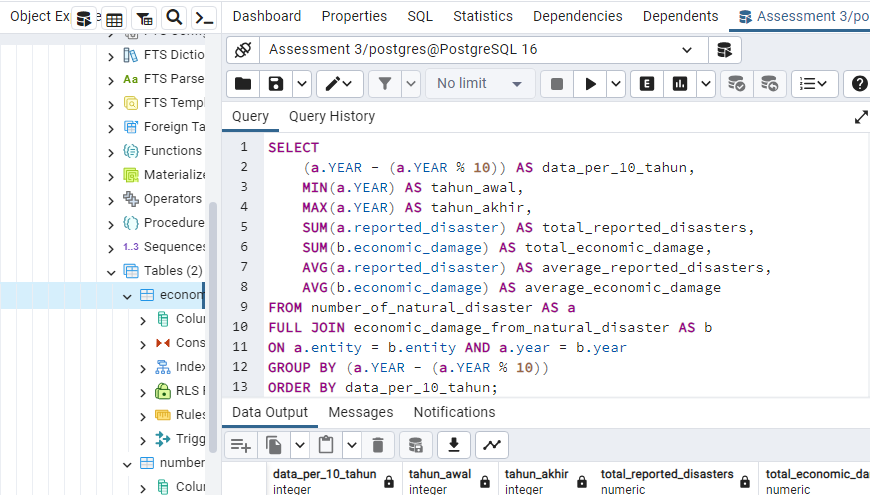

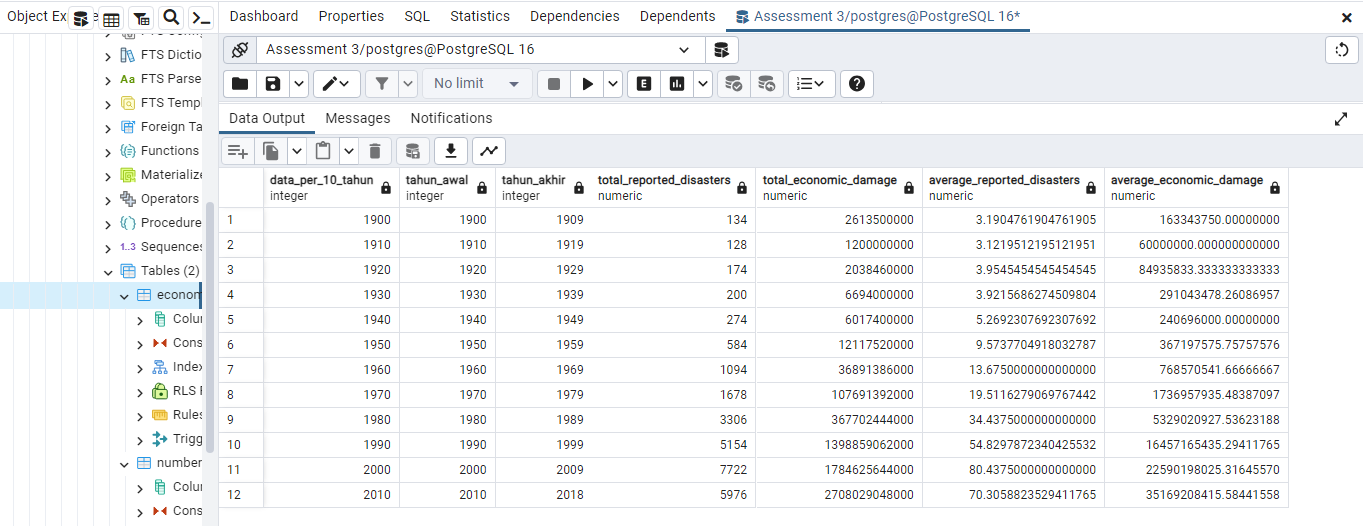

In [ ]:
# Menampilkan Gambar Kalkulasi rata rata dan jumlah data per-10 tahun pada Postgres
from IPython.display import Image, display
display(Image('C:/Users/User/Pictures/Screenshots/1.2.2.1.png', width=1000))
display(Image('C:/Users/User/Pictures/Screenshots/1.2.2.2.png', width=1000))

Didapatkan Hasil Rata - rata dan jumlah per-10 tahun dari Frequency Report Disaster dan Economic Damage:


1.   Tahun 1900 - 1909 didapatkan:

    *   Total Reported Disaster: 134
    *   Rata - Rata Reported Disaster: 3.1904761904761905
    *   Total Economic Damage: 2613500000
    *   Rata - Rata Economic Damage: 163343750.00000000

2.   Tahun 1910 - 1919 didapatkan:

    *   Total Reported Disaster: 128
    *   Rata - Rata Reported Disaster: 3.1219512195121951
    *   Total Economic Damage: 1200000000
    *   Rata - Rata Economic Damage: 60000000.000000000000

3.   Tahun 1920 - 1929 didapatkan:

    *   Total Reported Disaster: 174
    *   Rata - Rata Reported Disaster: 3.9545454545454545
    *   Total Economic Damage: 2038460000
    *   Rata - Rata Economic Damage: 84935833.333333333333

4.   Tahun 1930 - 1939 didapatkan:

    *   Total Reported Disaster: 200
    *   Rata - Rata Reported Disaster: 3.9215686274509804
    *   Total Economic Damage: 6694000000
    *   Rata - Rata Economic Damage: 291043478.26086957

5.   Tahun 1940 - 1949 didapatkan:

    *   Total Reported Disaster: 274
    *   Rata - Rata Reported Disaster: 5.2692307692307692
    *   Total Economic Damage: 6017400000
    *   Rata - Rata Economic Damage: 240696000.00000000

6.   Tahun 1950 - 1959 didapatkan:

    *   Total Reported Disaster: 584
    *   Rata - Rata Reported Disaster: 9.5737704918032787
    *   Total Economic Damage: 12117520000
    *   Rata - Rata Economic Damage: 367197575.75757576

7.   Tahun 1960 - 1969 didapatkan:

    *   Total Reported Disaster: 1094
    *   Rata - Rata Reported Disaster: 13.6750000000000000
    *   Total Economic Damage: 36891386000
    *   Rata - Rata Economic Damage: 768570541.66666667

8.   Tahun 1970 - 1979 didapatkan:

    *   Total Reported Disaster: 1678
    *   Rata - Rata Reported Disaster: 19.5116279069767442
    *   Total Economic Damage: 107691392000
    *   Rata - Rata Economic Damage: 1736957935.48387097

9.   Tahun 1980 - 1989 didapatkan:

    *   Total Reported Disaster: 3306
    *   Rata - Rata Reported Disaster: 34.4375000000000000
    *   Total Economic Damage: 367702444000
    *   Rata - Rata Economic Damage: 5329020927.53623188

10.   Tahun 1990 - 1999 didapatkan:

    *   Total Reported Disaster: 5154
    *   Rata - Rata Reported Disaster: 54.8297872340425532
    *   Total Economic Damage: 1398859062000
    *   Rata - Rata Economic Damage: 16457165435.29411765

11.   Tahun 2000 - 2009 didapatkan:

    *   Total Reported Disaster: 7722
    *   Rata - Rata Reported Disaster: 80.4375000000000000
    *   Total Economic Damage: 1784625644000
    *   Rata - Rata Economic Damage: 22590198025.31645570

12.   Tahun 2010 - 2018 didapatkan:

    *   Total Reported Disaster: 5976
    *   Rata - Rata Reported Disaster: 70.3058823529411765
    *   Total Economic Damage: 2708029048000
    *   Rata - Rata Economic Damage: 35169208415.58441558





In [ ]:
#conn.close()

# 2. Data Science and Statistical Analysis.

Refer to the previous assignment framework for exercises on Descriptive and Inferential Statistics, EDA, and Statistical Modeling.

In [ ]:
# Import Modul
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Load Dataset dengan pandas
df = pd.read_csv('Natural_Disaster.csv')

In [ ]:
# Menampilkan Informasi DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_date          561 non-null    object 
 1   year               828 non-null    int64  
 2   entity             828 non-null    object 
 3   reported_disaster  828 non-null    int64  
 4   economic_damage    561 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 32.5+ KB


In [ ]:
# Mengubah tipe data year_date menjadi datetime
df['year_date'] = pd.to_datetime(df['year_date'], format = '%Y-%m-%d')

In [ ]:
# Menampilkan Informasi DataFrame Kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_date          561 non-null    datetime64[ns]
 1   year               828 non-null    int64         
 2   entity             828 non-null    object        
 3   reported_disaster  828 non-null    int64         
 4   economic_damage    561 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 32.5+ KB


In [ ]:
# Menampilkan 5 data teratas
df.head()

year_date  year                 entity  reported_disaster  economic_damage
0 1900-01-01  1900  All natural disasters                  5       30000000.0
1 1901-01-01  1901  All natural disasters                  2              0.0
2 1902-01-01  1902  All natural disasters                  9              0.0
3 1903-01-01  1903  All natural disasters                  8      480000000.0
4 1904-01-01  1904  All natural disasters                  2              0.0

In [ ]:
#Memisahkan Tipe Data Numerik dan Non Numerik
df_cat = df.select_dtypes(exclude=[np.number])
df_num = df.select_dtypes(include=[np.number])

In [ ]:
# Menampilkan jumlah data laporan berdasarkan kolom Entity
df.groupby('entity')['reported_disaster'].sum()

entity
All natural disasters    13212
Drought                    727
Earthquake                1372
Extreme temperature        575
Extreme weather           4129
Flood                     4960
Impact                       1
Landslide                  712
Mass movement (dry)         57
Volcanic activity          249
Wildfire                   430
Name: reported_disaster, dtype: int64

## Descriptive Statistics

In [ ]:
# Menampilkan Statistik Deskriptif
df.describe()

year_date         year  reported_disaster   
count                            561   828.000000         828.000000  \
mean   1977-03-21 01:37:32.406417120  1969.506039          31.913043   
min              1900-01-01 00:00:00  1900.000000           1.000000   
25%              1959-01-01 00:00:00  1946.000000           2.000000   
50%              1984-01-01 00:00:00  1975.000000           7.000000   
75%              2001-01-01 00:00:00  1997.000000          23.000000   
max              2018-01-01 00:00:00  2018.000000         432.000000   
std                              NaN    32.540756          67.393086   

       economic_damage  
count     5.610000e+02  
mean      1.146966e+10  
min       0.000000e+00  
25%       6.850000e+07  
50%       8.400000e+08  
75%       5.444777e+09  
max       3.640932e+11  
std       3.199525e+10

Mean

  *   Year: 1969.506039
  *   Reported Disaster: 31.913043
  *   Economic Damage: 1.146966e+10


Median

  *   Year: 1975
  *   Reported Disaster: 7.000000
  *   Economic Damage: 8.400000e+08

Standar Deviasi

  *   Year: 32.540756
  *   Reported Disaster: 67.393086
  *   Economic Damage: 3.199525e+10


Mencari Statistika Deskriptif pada setiap natural disaster di kolom entity.

### All natural disaster

In [ ]:
# Menampilkan Statistik Deskriptif dari All natural disasters pada kolom entity
df[df['entity'] == 'All natural disasters'].describe()

year_date         year  reported_disaster   
count                            119   119.000000         119.000000  \
mean   1959-01-01 03:13:36.806722688  1959.000000         111.025210   
min              1900-01-01 00:00:00  1900.000000           2.000000   
25%              1929-07-02 12:00:00  1929.500000          10.500000   
50%              1959-01-01 00:00:00  1959.000000          33.000000   
75%              1988-07-02 00:00:00  1988.500000         202.000000   
max              2018-01-01 00:00:00  2018.000000         432.000000   
std                              NaN    34.496377         133.958282   

       economic_damage  
count     1.190000e+02  
mean      2.703563e+10  
min       0.000000e+00  
25%       6.075000e+07  
50%       1.043000e+09  
75%       2.725059e+10  
max       3.640932e+11  
std       5.517178e+10

Mean All Natural Disaster

  *   Year: 1959
  *   Reported Disaster: 111.025210
  *   Economic Damage: 2.703563e+10


Median All Natural Disaster

  *   Year: 1959
  *   Reported Disaster: 33.000000
  *   Economic Damage: 1.043000e+09

Standar Deviasi All Natural Disaster

  *   Year: 34.496377
  *   Reported Disaster: 133.958282
  *   Economic Damage: 5.517178e+10


### Drought

In [ ]:
# Menampilkan Statistik Deskriptif dari Drought pada kolom entity
df[df['entity'] == 'Drought'].describe()

year_date         year  reported_disaster   
count                             49    73.000000          73.000000  \
mean   1993-02-14 08:48:58.775510144  1976.410959           9.958904   
min              1965-01-01 00:00:00  1900.000000           1.000000   
25%              1981-01-01 00:00:00  1964.000000           2.000000   
50%              1994-01-01 00:00:00  1982.000000           9.000000   
75%              2006-01-01 00:00:00  2000.000000          15.000000   
max              2018-01-01 00:00:00  2018.000000          32.000000   
std                              NaN    30.755232           7.727006   

       economic_damage  
count     4.900000e+01  
mean      3.403306e+09  
min       1.000000e+06  
25%       2.340000e+08  
50%       1.515100e+09  
75%       3.628700e+09  
max       2.548000e+10  
std       5.138275e+09

Mean Drought

  *   Year: 1976
  *   Reported Disaster: 9.958904
  *   Economic Damage: 3.403306e+09


Median Drought
  *   Year: 1982
  *   Reported Disaster: 9.000000
  *   Economic Damage: 1.515100e+09

Standar Deviasi Drought

  *   Year: 30.755232
  *   Reported Disaster: 7.727006
  *   Economic Damage: 5.138275e+09


### Earthquake

In [ ]:
# Menampilkan Statistik Deskriptif dari Earthquake pada kolom entity
df[df['entity'] == 'Earthquake'].describe()

year_date         year  reported_disaster   
count                             83   115.000000         115.000000  \
mean   1973-11-09 01:26:44.819277104  1960.469565          11.930435   
min              1906-01-01 00:00:00  1901.000000           1.000000   
25%              1955-01-01 00:00:00  1931.500000           3.000000   
50%              1977-01-01 00:00:00  1961.000000           7.000000   
75%              1997-07-02 12:00:00  1989.500000          21.000000   
max              2018-01-01 00:00:00  2018.000000          43.000000   
std                              NaN    34.066839          10.839112   

       economic_damage  
count     8.300000e+01  
mean      9.818089e+09  
min       6.500000e+05  
25%       7.125000e+07  
50%       9.400000e+08  
75%       6.030506e+09  
max       2.302998e+11  
std       2.970032e+10

Mean Earthquake

  *   Year: 1960.469565
  *   Reported Disaster: 11.930435
  *   Economic Damage: 9.818089e+09


Median Earthquake
  *   Year: 1961
  *   Reported Disaster: 7.000000
  *   Economic Damage: 9.400000e+08

Standar Deviasi Earthquake

  *   Year: 34.066839
  *   Reported Disaster: 10.839112
  *   Economic Damage: 2.970032e+10


### Extreme temperature

In [ ]:
# Menampilkan Statistik Deskriptif dari Extreme temperature pada kolom entity
df[df['entity'] == 'Extreme temperature'].describe()

year_date         year  reported_disaster   
count                             34    57.000000          57.000000  \
mean   1996-01-01 09:10:35.294117632  1988.140351          10.087719   
min              1951-01-01 00:00:00  1936.000000           1.000000   
25%              1986-07-02 12:00:00  1975.000000           2.000000   
50%              1998-07-02 12:00:00  1990.000000           6.000000   
75%              2009-10-01 18:00:00  2004.000000          14.000000   
max              2018-01-01 00:00:00  2018.000000          51.000000   
std                              NaN    19.652734          10.401375   

       economic_damage  
count     3.400000e+01  
mean      1.849010e+09  
min       0.000000e+00  
25%       1.110000e+08  
50%       5.600000e+08  
75%       1.585750e+09  
max       2.194000e+10  
std       4.196814e+09

Mean Extreme temprature

  *   Year: 1988.140351
  *   Reported Disaster: 10.087719
  *   Economic Damage: 1.849010e+09


Median Extreme temprature
  *   Year: 1990
  *   Reported Disaster: 6.000000
  *   Economic Damage: 5.600000e+08

Standar Deviasi Extreme temprature

  *   Year: 19.652734
  *   Reported Disaster: 10.401375
  *   Economic Damage: 4.196814e+09


### Extreme weather

In [ ]:
# Menampilkan Statistik Deskriptif dari Extreme weather pada kolom entity
df[df['entity'] == 'Extreme weather'].describe()

year_date         year  reported_disaster   
count                             94   115.000000         115.000000  \
mean   1968-06-04 19:24:15.319148936  1960.730435          35.904348   
min              1900-01-01 00:00:00  1900.000000           1.000000   
25%              1945-04-02 06:00:00  1932.500000           4.000000   
50%              1971-07-02 12:00:00  1961.000000          19.000000   
75%              1994-10-01 18:00:00  1989.500000          69.500000   
max              2018-01-01 00:00:00  2018.000000         137.000000   
std                              NaN    33.764229          39.397207   

       economic_damage  
count     9.400000e+01  
mean      1.363404e+10  
min       5.000000e+05  
25%       7.350000e+07  
50%       1.365849e+09  
75%       1.450463e+10  
max       1.847935e+11  
std       2.814131e+10

Mean Extreme weather

  *   Year: 1960.730435
  *   Reported Disaster: 35.904348
  *   Economic Damage: 1.363404e+10


Median Extreme weather
  *   Year: 1961
  *   Reported Disaster: 19.000000
  *   Economic Damage: 1.365849e+09

Standar Deviasi Extreme weather

  *   Year: 33.764229
  *   Reported Disaster: 39.397207
  *   Economic Damage: 2.814131e+10


### Flood

In [ ]:
# Menampilkan Statistik Deskriptif dari Flood pada kolom entity
df[df['entity'] == 'Flood'].describe()

year_date         year  reported_disaster   
count                             69    95.000000          95.000000  \
mean   1980-03-26 02:05:13.043478272  1968.410526          52.210526   
min              1903-01-01 00:00:00  1900.000000           1.000000   
25%              1967-01-01 00:00:00  1947.500000           2.500000   
50%              1984-01-01 00:00:00  1971.000000          20.000000   
75%              2001-01-01 00:00:00  1994.500000          90.000000   
max              2018-01-01 00:00:00  2018.000000         226.000000   
std                              NaN    31.602079          61.829535   

       economic_damage  
count     6.900000e+01  
mean      1.142337e+10  
min       2.300000e+05  
25%       5.563000e+08  
50%       3.801950e+09  
75%       1.793967e+10  
max       7.075705e+10  
std       1.586724e+10

Mean Flood

  *   Year: 1968.410526
  *   Reported Disaster: 52.210526
  *   Economic Damage: 1.142337e+10


Median Flood
  *   Year: 1971
  *   Reported Disaster: 20.000000
  *   Economic Damage: 3.801950e+09

Standar Deviasi Flood

  *   Year: 31.602079
  *   Reported Disaster: 61.829535
  *   Economic Damage: 1.586724e+10


### Impact

In [ ]:
# Menampilkan Statistik Deskriptif dari Impact pada kolom entity
df[df['entity'] == 'Impact'].describe()

year_date    year  reported_disaster  economic_damage
count                    1     1.0                1.0              1.0
mean   2013-01-01 00:00:00  2013.0                1.0       33000000.0
min    2013-01-01 00:00:00  2013.0                1.0       33000000.0
25%    2013-01-01 00:00:00  2013.0                1.0       33000000.0
50%    2013-01-01 00:00:00  2013.0                1.0       33000000.0
75%    2013-01-01 00:00:00  2013.0                1.0       33000000.0
max    2013-01-01 00:00:00  2013.0                1.0       33000000.0
std                    NaN     NaN                NaN              NaN

Mean Impact

  *   Year: 2013
  *   Reported Disaster: 1
  *   Economic Damage: 33000000.0


Median Impact
  *   Year: 2013
  *   Reported Disaster: 1
  *   Economic Damage: 33000000.0

Standar Deviasi Impact

  *   Year: NaN
  *   Reported Disaster: NaN
  *   Economic Damage: NaN


### Landslide

In [ ]:
# Menampilkan Statistik Deskriptif dari Landslide pada kolom entity
df[df['entity'] == 'Landslide'].describe()

year_date         year  reported_disaster   
count                             34    80.000000          80.000000  \
mean   1994-10-17 22:35:17.647058816  1976.312500           8.900000   
min              1951-01-01 00:00:00  1909.000000           1.000000   
25%              1984-10-01 00:00:00  1958.750000           2.000000   
50%              1996-07-02 00:00:00  1978.500000           6.000000   
75%              2004-10-01 12:00:00  1998.250000          13.500000   
max              2018-01-01 00:00:00  2018.000000          32.000000   
std                              NaN    26.914113           8.121857   

       economic_damage  
count     3.400000e+01  
mean      3.083922e+08  
min       2.700000e+04  
25%       2.000000e+07  
50%       6.645000e+07  
75%       5.848500e+08  
max       1.277078e+09  
std       3.776200e+08

Mean Landslide

  *   Year: 1976.312500
  *   Reported Disaster: 8.900000
  *   Economic Damage: 3.083922e+08

Median Landslide
  *   Year: 1978.500000
  *   Reported Disaster: 6.000000
  *   Economic Damage: 6.645000e+07

Standar Deviasi Landslide

  *   Year: 26.914113
  *   Reported Disaster: 8.121857
  *   Economic Damage: 3.776200e+08


### Mass movement (dry)

In [ ]:
# Menampilkan Statistik Deskriptif dari Mass movement (dry) pada kolom entity
df[df['entity'] == 'Mass movement (dry)'].describe()

year_date         year  reported_disaster  economic_damage
count                    5    33.000000          33.000000     5.000000e+00
mean   1994-05-27 00:00:00  1976.090909           1.727273     4.232000e+07
min    1962-01-01 00:00:00  1903.000000           1.000000     0.000000e+00
25%    1987-01-01 00:00:00  1963.000000           1.000000     1.000000e+06
50%    1992-01-01 00:00:00  1987.000000           1.000000     2.600000e+06
75%    2013-01-01 00:00:00  2002.000000           2.000000     8.000000e+06
max    2018-01-01 00:00:00  2018.000000           5.000000     2.000000e+08
std                    NaN    34.532922           1.206045     8.819984e+07

Mean Mass movement (dry)

  *   Year: 	1976.090909
  *   Reported Disaster: 1.727273
  *   Economic Damage: 4.232000e+07

Median Mean Mass movement (dry)
  *   Year: 1978
  *   Reported Disaster: 1.000000
  *   Economic Damage: 2.600000e+06

Standar Deviasi Mean Mass movement (dry)

  *   Year: 34.532922
  *   Reported Disaster: 1.206045
  *   Economic Damage: 8.819984e+07


### Volcanic activity

In [ ]:
# Menampilkan Statistik Deskriptif dari volcanic activity pada kolom entity
df[df['entity'] == 'Volcanic activity'].describe()

year_date         year  reported_disaster   
count                             29    78.000000          78.000000  \
mean   1987-03-05 04:08:16.551724160  1971.717949           3.192308   
min              1914-01-01 00:00:00  1900.000000           1.000000   
25%              1976-01-01 00:00:00  1950.250000           1.000000   
50%              1991-01-01 00:00:00  1978.500000           2.000000   
75%              2001-01-01 00:00:00  1997.750000           5.000000   
max              2018-01-01 00:00:00  2018.000000          12.000000   
std                              NaN    32.291247           2.497051   

       economic_damage  
count     2.900000e+01  
mean      1.356521e+08  
min       0.000000e+00  
25%       3.564000e+06  
50%       1.665500e+07  
75%       1.500000e+08  
max       1.000000e+09  
std       2.548412e+08

Mean Volcanic Activity

  *   Year: 	1971.717949
  *   Reported Disaster: 3.192308
  *   Economic Damage: 1.356521e+08

Median Volcanic Activity
  *   Year: 1978.500000
  *   Reported Disaster: 2.000000
  *   Economic Damage: 1.665500e+07

Standar Deviasi Volcanic Activity
  *   Year: 32.291247
  *   Reported Disaster: 2.497051
  *   Economic Damage: 2.548412e+08


### Wildfire

In [ ]:
# Menampilkan Statistik Deskriptif dari wildfire pada kolom entity
df[df['entity'] == 'Wildfire'].describe()

year_date         year  reported_disaster   
count                             44    62.000000          62.000000  \
mean   1991-10-02 01:38:10.909090944  1983.354839           6.935484   
min              1918-01-01 00:00:00  1911.000000           1.000000   
25%              1983-10-01 18:00:00  1971.250000           2.000000   
50%              1996-07-02 00:00:00  1986.500000           4.500000   
75%              2007-04-02 06:00:00  2002.750000          10.000000   
max              2018-01-01 00:00:00  2018.000000          30.000000   
std                              NaN    25.501589           6.256461   

       economic_damage  
count     4.400000e+01  
mean      2.005324e+09  
min       1.000000e+06  
25%       9.750000e+07  
50%       7.353250e+08  
75%       2.567485e+09  
max       2.274500e+10  
std       3.757417e+09

Mean Wildfire

  *   Year: 	1983.354839
  *   Reported Disaster: 6.935484
  *   Economic Damage: 2.005324e+09

Median Wildfire
  *   Year: 1986.500000
  *   Reported Disaster: 4.500000
  *   Economic Damage: 7.353250e+08

Standar Deviasi Wildfire

  *   Year: 25.501589
  *   Reported Disaster: 6.256461
  *   Economic Damage: 3.757417e+09


## Exploratory Data Analysis

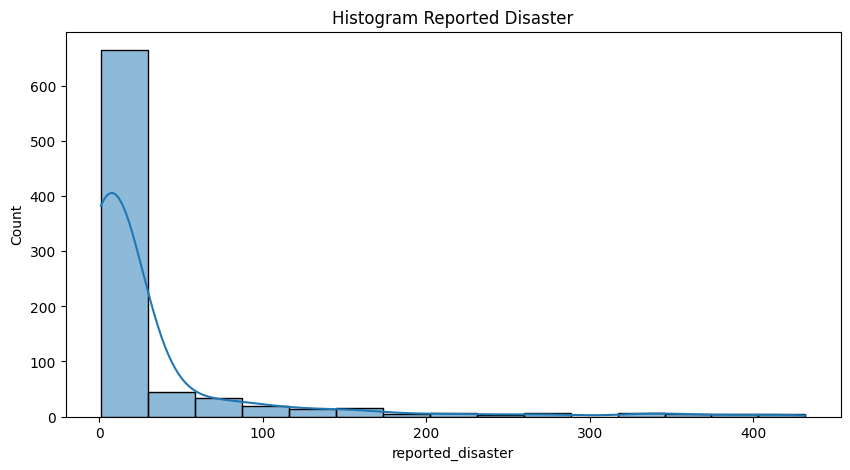

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, figsize=(10, 5))

# Membuat Plot Distribusi dari kolom 'reported_disaster' pada DataFrame df dengan 20 bins
sns.histplot(data=df, x='reported_disaster', kde=True, bins=15, ax=ax)

# Membuat Judul Pada Plot DataFrame df
ax.set_title('Histogram Reported Disaster')

# Menampilkan Plot
plt.show()


Dari Histogram di atas di dapatkan bahwa reported disaster terdapat pada rentang 0 - 400, dimana persebaran reported disaster tertinggi terdapat pada rentang 0-25 dengan jumah sekitar 600 kejadian. Sedangkan sisanya dengan jumlah dalam rentang 0 - 50.

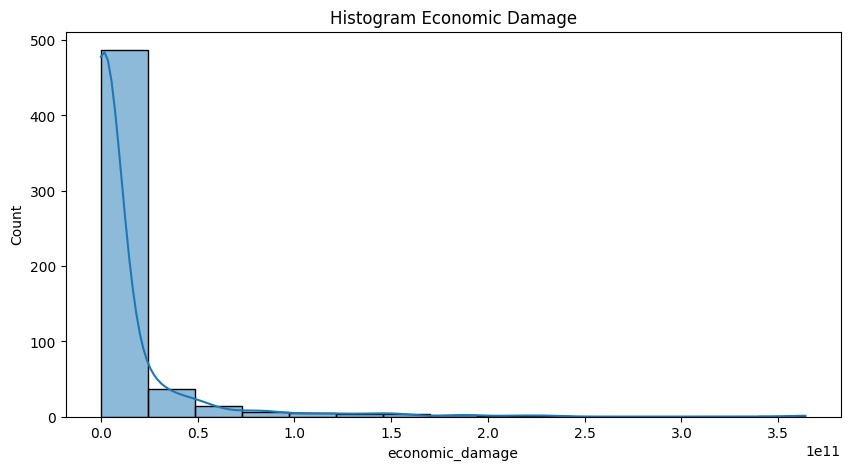

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, figsize=(10, 5))

# Membuat Plot Distribusi dari kolom 'reported_disaster' pada DataFrame df dengan 20 bins
sns.histplot(data=df, x='economic_damage', kde=True, bins=15, ax=ax)

# Membuat Judul Pada Plot DataFrame df
ax.set_title('Histogram Economic Damage')

# Menampilkan Plot
plt.show()

Dari Histogram di atas di dapatkan bahwa economic damage terdapat pada rentang 0 - 3.5, dimana persebaran reported disaster tertinggi terdapat pada rentang 0-0.3 dengan jumah economic damage sekitar 490. Sedangkan sisanya hanya berada dengan jumlah dalam rentang sekitar 0 - 40.

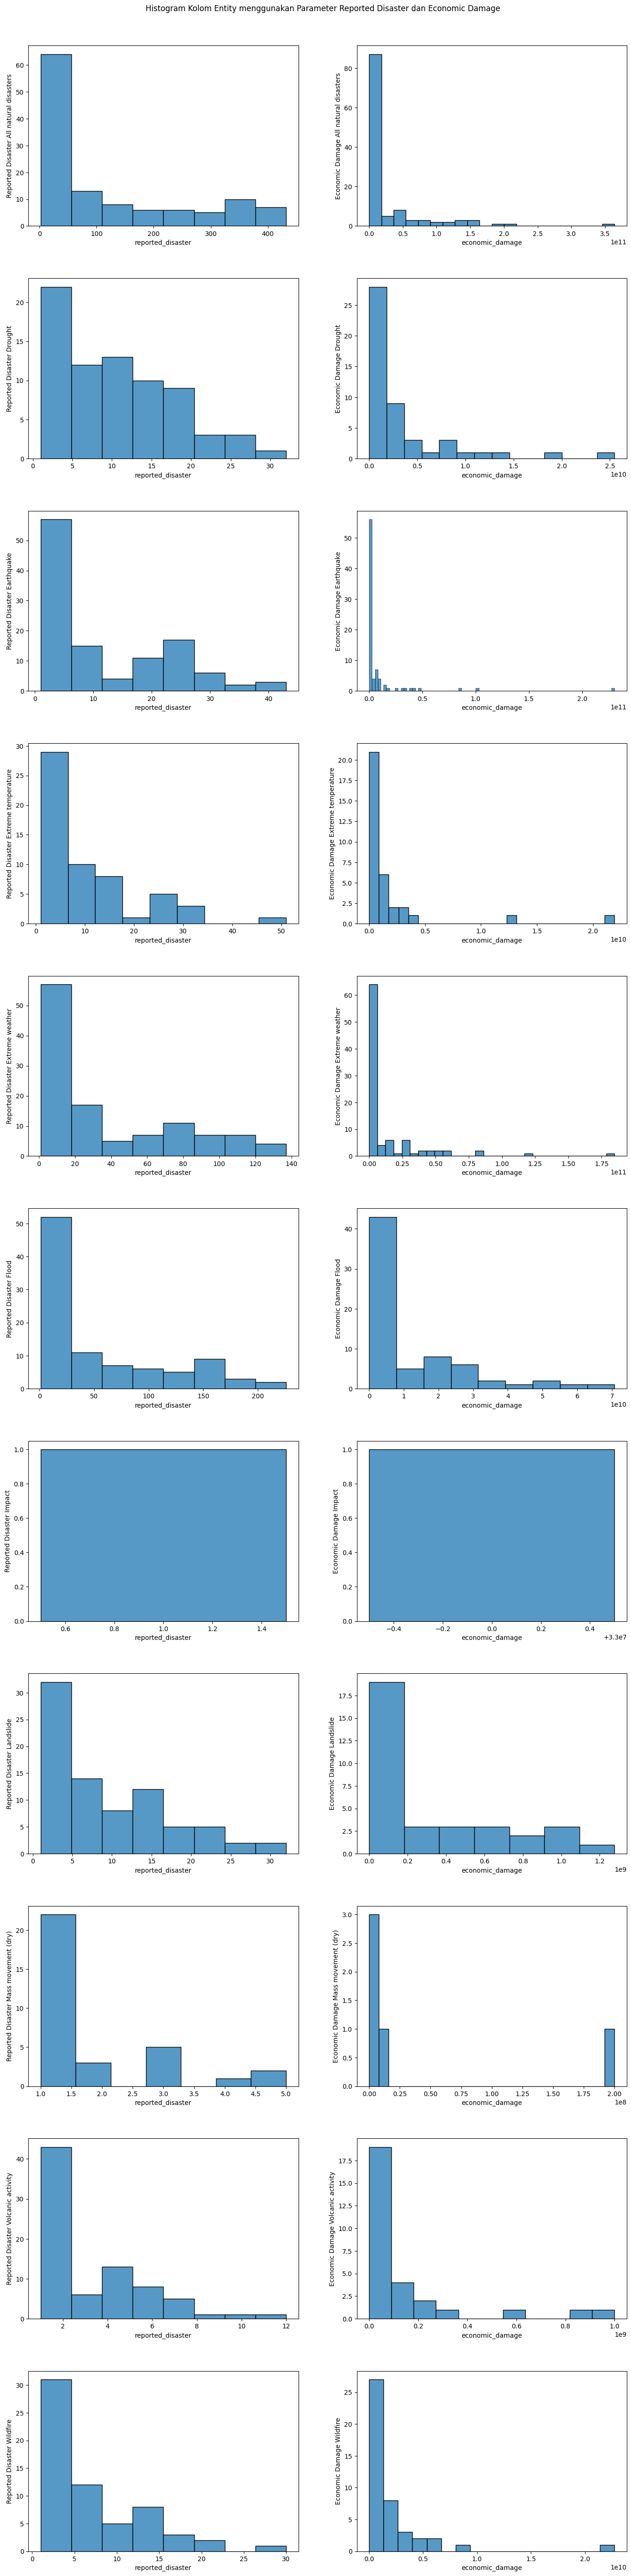

In [ ]:
#Membuat Boxplot dengan ukuran 6 baris dan 2 kolom
fig, axes = plt.subplots(11, 2, figsize=(15,56))
fig.tight_layout(pad=6)

#Menambahkan judul utama (super title)
fig.suptitle('Histogram Kolom Entity menggunakan Parameter Reported Disaster dan Economic Damage', y=1)

#Membuat Boxplot berdasarkan kolom Entity
sns.histplot(ax=axes[0,0], data=df[df['entity']=='All natural disasters'], x='reported_disaster')
sns.histplot(ax=axes[0,1], data=df[df['entity']=='All natural disasters'], x='economic_damage', bins = 20)
sns.histplot(ax=axes[1,0], data=df[df['entity']=='Drought'], x='reported_disaster')
sns.histplot(ax=axes[1,1], data=df[df['entity']=='Drought'], x='economic_damage')
sns.histplot(ax=axes[2,0], data=df[df['entity']=='Earthquake'], x='reported_disaster')
sns.histplot(ax=axes[2,1], data=df[df['entity']=='Earthquake'], x='economic_damage')
sns.histplot(ax=axes[3,0], data=df[df['entity']=='Extreme temperature'], x='reported_disaster')
sns.histplot(ax=axes[3,1], data=df[df['entity']=='Extreme temperature'], x='economic_damage')
sns.histplot(ax=axes[4,0], data=df[df['entity']=='Extreme weather'], x='reported_disaster')
sns.histplot(ax=axes[4,1], data=df[df['entity']=='Extreme weather'], x='economic_damage')
sns.histplot(ax=axes[5,0], data=df[df['entity']=='Flood'], x='reported_disaster')
sns.histplot(ax=axes[5,1], data=df[df['entity']=='Flood'], x='economic_damage')
sns.histplot(ax=axes[6,0], data=df[df['entity']=='Impact'], x='reported_disaster')
sns.histplot(ax=axes[6,1], data=df[df['entity']=='Impact'], x='economic_damage')
sns.histplot(ax=axes[7,0], data=df[df['entity']=='Landslide'], x='reported_disaster')
sns.histplot(ax=axes[7,1], data=df[df['entity']=='Landslide'], x='economic_damage')
sns.histplot(ax=axes[8,0], data=df[df['entity']=='Mass movement (dry)'], x='reported_disaster')
sns.histplot(ax=axes[8,1], data=df[df['entity']=='Mass movement (dry)'], x='economic_damage')
sns.histplot(ax=axes[9,0], data=df[df['entity']=='Volcanic activity'], x='reported_disaster')
sns.histplot(ax=axes[9,1], data=df[df['entity']=='Volcanic activity'], x='economic_damage')
sns.histplot(ax=axes[10,0], data=df[df['entity']=='Wildfire'], x='reported_disaster')
sns.histplot(ax=axes[10,1], data=df[df['entity']=='Wildfire'], x='economic_damage')


#Memberi Label pada Histogram
axes[0,0].set(ylabel='Reported Disaster All natural disasters')
axes[0,1].set(ylabel='Economic Damage All natural disasters')
axes[1,0].set(ylabel='Reported Disaster Drought')
axes[1,1].set(ylabel='Economic Damage Drought')
axes[2,0].set(ylabel='Reported Disaster Earthquake')
axes[2,1].set(ylabel='Economic Damage Earthquake')
axes[3,0].set(ylabel='Reported Disaster Extreme temperature')
axes[3,1].set(ylabel='Economic Damage Extreme temperature')
axes[4,0].set(ylabel='Reported Disaster Extreme weather')
axes[4,1].set(ylabel='Economic Damage Extreme weather')
axes[5,0].set(ylabel='Reported Disaster Flood')
axes[5,1].set(ylabel='Economic Damage Flood')
axes[6,0].set(ylabel='Reported Disaster Impact')
axes[6,1].set(ylabel='Economic Damage Impact')
axes[7,0].set(ylabel='Reported Disaster Landslide')
axes[7,1].set(ylabel='Economic Damage Landslide')
axes[8,0].set(ylabel='Reported Disaster Mass movement (dry)')
axes[8,1].set(ylabel='Economic Damage Mass movement (dry)')
axes[9,0].set(ylabel='Reported Disaster Volcanic activity')
axes[9,1].set(ylabel='Economic Damage Volcanic activity')
axes[10,0].set(ylabel='Reported Disaster Wildfire')
axes[10,1].set(ylabel='Economic Damage Wildfire')
plt.show()

Berdasarkan Histogram dari kolom Entity dengan menggunakan parameter reported disaster dan economic damage, diketahui bahwa:


1.   All natural disaster (Mencakup semua bencana alam atau semua entity)

  *   Reported Disaster
      - Frekuensi Reported Disaster berada pada rentang 0 - 400
      - Frekuensi tertinggi Reported Disaster berada pada  0 - 60 laporan, dengan jumlah kejadian kurang lebih 60 kejadian.
      - Frekuensi di atas 60 laporan, yaitu rentang 70-400, berada pada rentang 5 – 13 jumlah kejadian.
  *   Economic Damage
      - Rentang data: 0 hingga 3.5.
      - Frekuensi tertinggi berada pada rentang 0 hingga 0.2 dengan jumlah sekitar 80 laporan.
      - Rentang 1.7, 2.3 hingga 3.4 tidak memiliki jumlah laporan.

2.   Drought
  *   Reported Disaster
      - Frekuensi Reported Disaster berada pada rentang 1 – 30.
      - Frekuensi tertinggi Reported Disaster berada pada  1 - 5 laporan, dengan jumlah kejadian kurang lebih 20 kejadian.
      - Frekuensi terendah berada pada sekitar 30 laporan, dengan jumlah sekitar 2-3 kejadian.
  *   Economic Damage
      - Rentang data: 0 hingga 2.5.
      - Frekuensi tertinggi berada pada rentang 0 hingga 0.2 dengan jumlah sekitar 25 laporan.
      - Rentang 1.5 – 2 dan rentang 2 – 2.5 tidak memiliki jumlah laporan.

3.   Earthquake

 *   Reported Disaster
      - Frekuensi Reported Disaster berada pada rentang 1 – 40.
      - Frekuensi tertinggi Reported Disaster berada pada rentang  1 - 7 laporan, dengan jumlah kejadian kurang lebih 50 kejadian.
      - Frekuensi terendah berada pada sekitar 35, dengan jumlah laporan sekitar 2-3 kejadian.
  *   Economic Damage
      - Rentang data: 0 hingga 2.3.
      - Frekuensi tertinggi berada pada rentang 0 hingga 0.1 dengan jumlah sekitar 50 laporan.
      - Terdapat banyak data yang memiliki nilai outlier disekitar rentang 0.5 – 2.3.

4.   Extreme Temperature

  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 50.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 - 6 laporan, dengan jumlah kejadian kurang lebih 28 laporan.
        - Frekuensi terendah berada pada sekitar 40, karena tidak terdapat laporan kejadian.

    *   Economic Damage
        - Rentang data: 0 hingga 2.2.
        - Frekuensi tertinggi berada pada rentang 0 hingga 0.1 dengan jumlah sekitar 20  laporan.
        - Rentang 0.5 – 1.3 dan rentang 1.3 – 2.1 tidak memiliki jumlah laporan.


5.   Extreme Weather
  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 140.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 - 19 laporan, dengan jumlah kejadian kurang lebih sebanyak 50.
        - Frekuensi terendah berada pada sekitar 35 laporan, dengan jumlah sekitar 2-3 kejadian.

    *   Economic Damage
        - Rentang data: 0 hingga 1.80.
        - Frekuensi tertinggi berada pada rentang 0 hingga 0.8 dengan jumlah sekitar 60 laporan.
        - Terdapat banyak data yang memiliki nilai outlier disekitar rentang 0.62 – 1. 75.

6.   Flood
  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 225.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 - 30 laporan, dengan jumlah kejadian kurang lebih sebanyak 50.
        - Frekuensi terendah berada pada sekitar 200 laporan, dengan jumlah sekitar 2-3 kejadian.

    *   Economic Damage
        - Rentang data: 0 hingga 7.
        - Frekuensi tertinggi berada pada rentang 0 hingga 0.8 dengan jumlah sekitar 40 laporan.
        - Frekuensi laporan dari rentang 0.9 – 7 memiliki jumlah  kejadian di sekitar rentang 1 -8 laporan.

7.   Impact hanya memiliki 1 data, sehingga tidak memiliki pola histogram pada reported disaster dan economic damage.
8.   Lanslide
  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 30.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 – 5 laporan, dengan jumlah kejadian kurang lebih sebanyak 30.
        - Frekuensi terendah berada pada sekitar rentang 25 - 30 laporan, dengan jumlah sekitar 3 kejadian.

    *   Economic Damage
        - Frekuensi Reported Disaster berada pada rentang 1 – 30.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 – 5 laporan, dengan jumlah kejadian kurang lebih sebanyak 30.
        - Frekuensi terendah berada pada sekitar rentang 25 - 30 laporan, dengan jumlah sekitar 3 kejadian.

9.   Mass Movement (dry)
  *   Reported Disaster
      - Frekuensi Reported Disaster berada pada rentang 1 – 5.
      - Frekuensi tertinggi Reported Disaster berada pada rentang  1 – 1.6 laporan, dengan jumlah kejadian kurang lebih sebanyak 20.
      - Frekuensi terendah berada pada sekitar 2.5 dan 3.5 laporan karena tidak terdapat laporan.

    *   Economic Damage
      - Rentang data: 0 hingga 2.
      - Frekuensi tertinggi berada pada rentang 0 hingga 0.81 dengan jumlah 3 laporan.
      - Terdapat banyak data yang memiliki nilai outlier disekitar rentang 0.25 – 1. 75.

10.   Volcanic Activity
  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 12.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 – 2.1 laporan, dengan jumlah kejadian kurang lebih sebanyak 40.
        - Frekuensi terendah berada pada sekitar rentang 8 -12 dengan jumlah kejadian kurang lebih sebanyak 2.

    *   Economic Damage
        - Rentang data: 0 hingga 1.
        - Frekuensi tertinggi berada pada rentang 0 hingga 0.11 dengan jumlah 17.5 laporan.
        - Terdapat banyak data yang memiliki nilai outlier disekitar rentang 0.4 – 0. 5, dan 0. 7-0.8, karena tidak memiliki jumlah laporan.

11.   Wildfire
  *   Reported Disaster
        - Frekuensi Reported Disaster berada pada rentang 1 – 30.
        - Frekuensi tertinggi Reported Disaster berada pada rentang  1 – 5 laporan, dengan jumlah kejadian kurang lebih sebanyak 30.
        - Frekuensi terendah berada pada sekitar 25 laporan karena tidak memiliki jumlah kejadian.

    *   Economic Damage
        - Rentang data: 0 hingga 2.2.
        - Frekuensi tertinggi berada pada rentang 0 hingga 0.1 dengan jumlah 25 laporan.
        - Terdapat banyak data yang memiliki nilai outlier disekitar rentang 0. 7, dan 0. 9-2.1, karena tidak memiliki jumlah laporan.



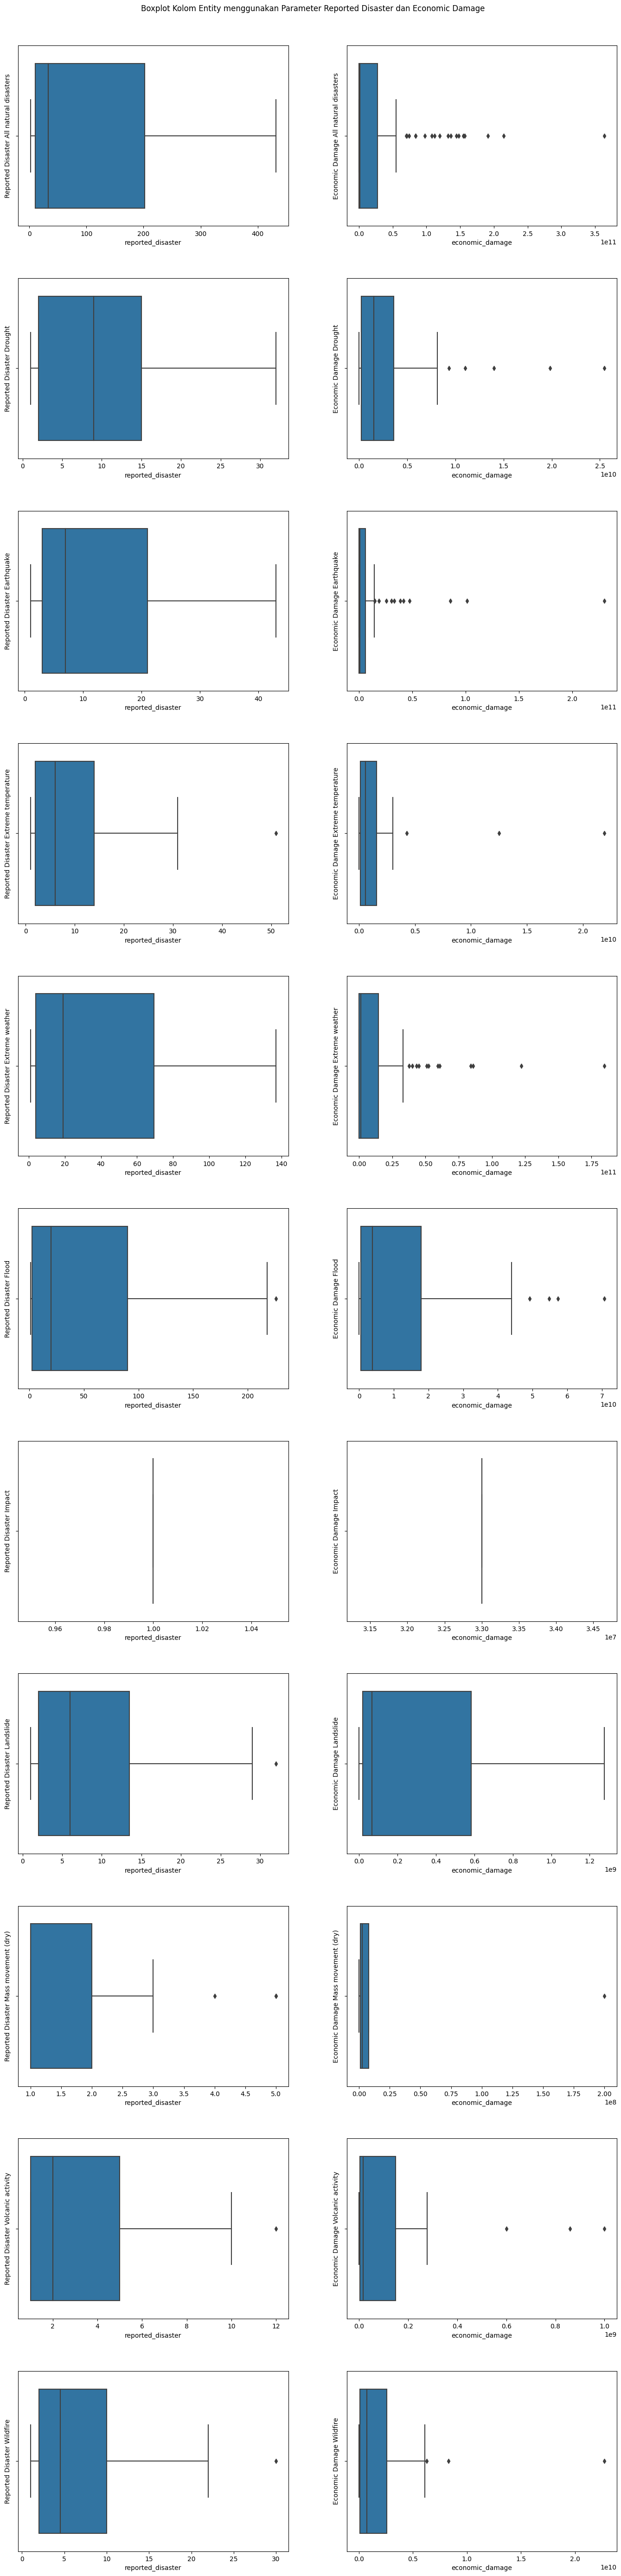

In [ ]:
#Membuat Boxplot dengan ukuran 6 baris dan 2 kolom
fig, axes = plt.subplots(11, 2, figsize=(15,56))
fig.tight_layout(pad=6)

#Menambahkan judul utama (super title)
fig.suptitle('Boxplot Kolom Entity menggunakan Parameter Reported Disaster dan Economic Damage', y=1)

#Membuat Boxplot berdasarkan kolom Entity
sns.boxplot(ax=axes[0,0], data=df[df['entity']=='All natural disasters'], x='reported_disaster')
sns.boxplot(ax=axes[0,1], data=df[df['entity']=='All natural disasters'], x='economic_damage')
sns.boxplot(ax=axes[1,0], data=df[df['entity']=='Drought'], x='reported_disaster')
sns.boxplot(ax=axes[1,1], data=df[df['entity']=='Drought'], x='economic_damage')
sns.boxplot(ax=axes[2,0], data=df[df['entity']=='Earthquake'], x='reported_disaster')
sns.boxplot(ax=axes[2,1], data=df[df['entity']=='Earthquake'], x='economic_damage')
sns.boxplot(ax=axes[3,0], data=df[df['entity']=='Extreme temperature'], x='reported_disaster')
sns.boxplot(ax=axes[3,1], data=df[df['entity']=='Extreme temperature'], x='economic_damage')
sns.boxplot(ax=axes[4,0], data=df[df['entity']=='Extreme weather'], x='reported_disaster')
sns.boxplot(ax=axes[4,1], data=df[df['entity']=='Extreme weather'], x='economic_damage')
sns.boxplot(ax=axes[5,0], data=df[df['entity']=='Flood'], x='reported_disaster')
sns.boxplot(ax=axes[5,1], data=df[df['entity']=='Flood'], x='economic_damage')
sns.boxplot(ax=axes[6,0], data=df[df['entity']=='Impact'], x='reported_disaster')
sns.boxplot(ax=axes[6,1], data=df[df['entity']=='Impact'], x='economic_damage')
sns.boxplot(ax=axes[7,0], data=df[df['entity']=='Landslide'], x='reported_disaster')
sns.boxplot(ax=axes[7,1], data=df[df['entity']=='Landslide'], x='economic_damage')
sns.boxplot(ax=axes[8,0], data=df[df['entity']=='Mass movement (dry)'], x='reported_disaster')
sns.boxplot(ax=axes[8,1], data=df[df['entity']=='Mass movement (dry)'], x='economic_damage')
sns.boxplot(ax=axes[9,0], data=df[df['entity']=='Volcanic activity'], x='reported_disaster')
sns.boxplot(ax=axes[9,1], data=df[df['entity']=='Volcanic activity'], x='economic_damage')
sns.boxplot(ax=axes[10,0], data=df[df['entity']=='Wildfire'], x='reported_disaster')
sns.boxplot(ax=axes[10,1], data=df[df['entity']=='Wildfire'], x='economic_damage')


#Memberi Label pada Histogram
axes[0,0].set(ylabel='Reported Disaster All natural disasters')
axes[0,1].set(ylabel='Economic Damage All natural disasters')
axes[1,0].set(ylabel='Reported Disaster Drought')
axes[1,1].set(ylabel='Economic Damage Drought')
axes[2,0].set(ylabel='Reported Disaster Earthquake')
axes[2,1].set(ylabel='Economic Damage Earthquake')
axes[3,0].set(ylabel='Reported Disaster Extreme temperature')
axes[3,1].set(ylabel='Economic Damage Extreme temperature')
axes[4,0].set(ylabel='Reported Disaster Extreme weather')
axes[4,1].set(ylabel='Economic Damage Extreme weather')
axes[5,0].set(ylabel='Reported Disaster Flood')
axes[5,1].set(ylabel='Economic Damage Flood')
axes[6,0].set(ylabel='Reported Disaster Impact')
axes[6,1].set(ylabel='Economic Damage Impact')
axes[7,0].set(ylabel='Reported Disaster Landslide')
axes[7,1].set(ylabel='Economic Damage Landslide')
axes[8,0].set(ylabel='Reported Disaster Mass movement (dry)')
axes[8,1].set(ylabel='Economic Damage Mass movement (dry)')
axes[9,0].set(ylabel='Reported Disaster Volcanic activity')
axes[9,1].set(ylabel='Economic Damage Volcanic activity')
axes[10,0].set(ylabel='Reported Disaster Wildfire')
axes[10,1].set(ylabel='Economic Damage Wildfire')
plt.show()

Berdasarkan Boxplot dari kolom Entity dengan menggunakan parameter reported disaster dan economic damage, diketahui bahwa:


1.   All natural disaster

  Tidak ada nilai outlier pada Reported Disaster, sementara Economic Damage menunjukkan keberadaan nilai outlier. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram all natural disaster dengan parameter Reported Disaster menunjukkan bahwa tidak ada data yang kosong. Sebaliknya, histogram dengan parameter Economic Damage menunjukkan keberadaan banyak data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

2.   Drought

  Tidak ada nilai outlier pada Reported Disaster, sementara Economic Damage menunjukkan keberadaan nilai outlier. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram Drought dengan parameter Reported Disaster menunjukkan bahwa tidak ada data yang kosong. Sebaliknya, histogram dengan parameter Economic Damage menunjukkan keberadaan banyak data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

3.   Earthquake

  Tidak ada nilai outlier pada Reported Disaster, sementara Economic Damage menunjukkan keberadaan nilai outlier. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram Earthquake disaster dengan parameter Reported Disaster menunjukkan bahwa tidak ada data yang kosong. Sebaliknya, histogram dengan parameter Economic Damage menunjukkan keberadaan banyak data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

4.  Extreme Temperature

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk Extreme Temperature dengan parameter Reported Disaster dan Economic Damage menunjukkan adanya data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

5.   Extreme weather
  
  Tidak ada nilai outlier pada Reported Disaster, sementara Economic Damage menunjukkan keberadaan nilai outlier. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram Extreme weather dengan parameter Reported Disaster menunjukkan bahwa tidak ada data yang kosong. Sebaliknya, histogram dengan parameter Economic Damage menunjukkan keberadaan banyak data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

6.   Flood

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk Flood dengan parameter Reported Disaster memiliki 1 batang yang berbeda dari rata – rata batang histogram lainnya, dan pada parameter Economic Damage juga terdapat beberapa batang yang berbeda dari rata – rata batang histogram lainnya.
8.   Impact hanya memiliki 1 data, sehingga tidak memiliki pola histogram pada reported disaster dan economic damage.

8.   Landslide

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk Flood dengan parameter Reported Disaster dan pada parameter Economic terdapat batang yang berbeda dari rata – rata batang histogram lainnya.

9.   Mass Movement (dry)

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk Mass Movement (dry) dengan parameter Reported Disaster dan Economic Damage menunjukkan adanya data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

10.   Volcanic Activity

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk Volcanic Activity
dengan parameter Reported Disaster terdapat beberapa batang yang berbeda dari rata – rata batang histogram lainnya sedangkan pada parameter Economic Damage menunjukkan adanya data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.

11.   Wildfire

  Terdapat adanya nilai outlier pada Reported Disaster dan Economic Damage. Hal ini dapat dibuktikan melalui histogram di atas, dimana histogram untuk wildfire dengan parameter Reported Disaster dan Economic Damage menunjukkan adanya data yang kosong, hal ini dapat mengindikasikan adanya nilai outlier.


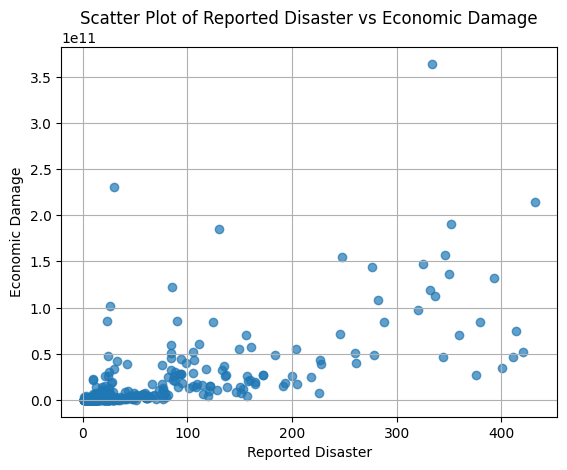

In [ ]:
# Membuat Scatterplot dari Variabel Reported Disaster dan Economic Damage pada DataFrame
plt.scatter(df['reported_disaster'],df['economic_damage'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df['reported_disaster'], df['economic_damage'], 1)
x = np.array(df['reported_disaster'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Reported Disaster vs Economic Damage')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Reported Disaster')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Economic Damage')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Korelasi antara Reported Disaster dengan Economic Damage lemah, dan masih terdapat beberapa outlier

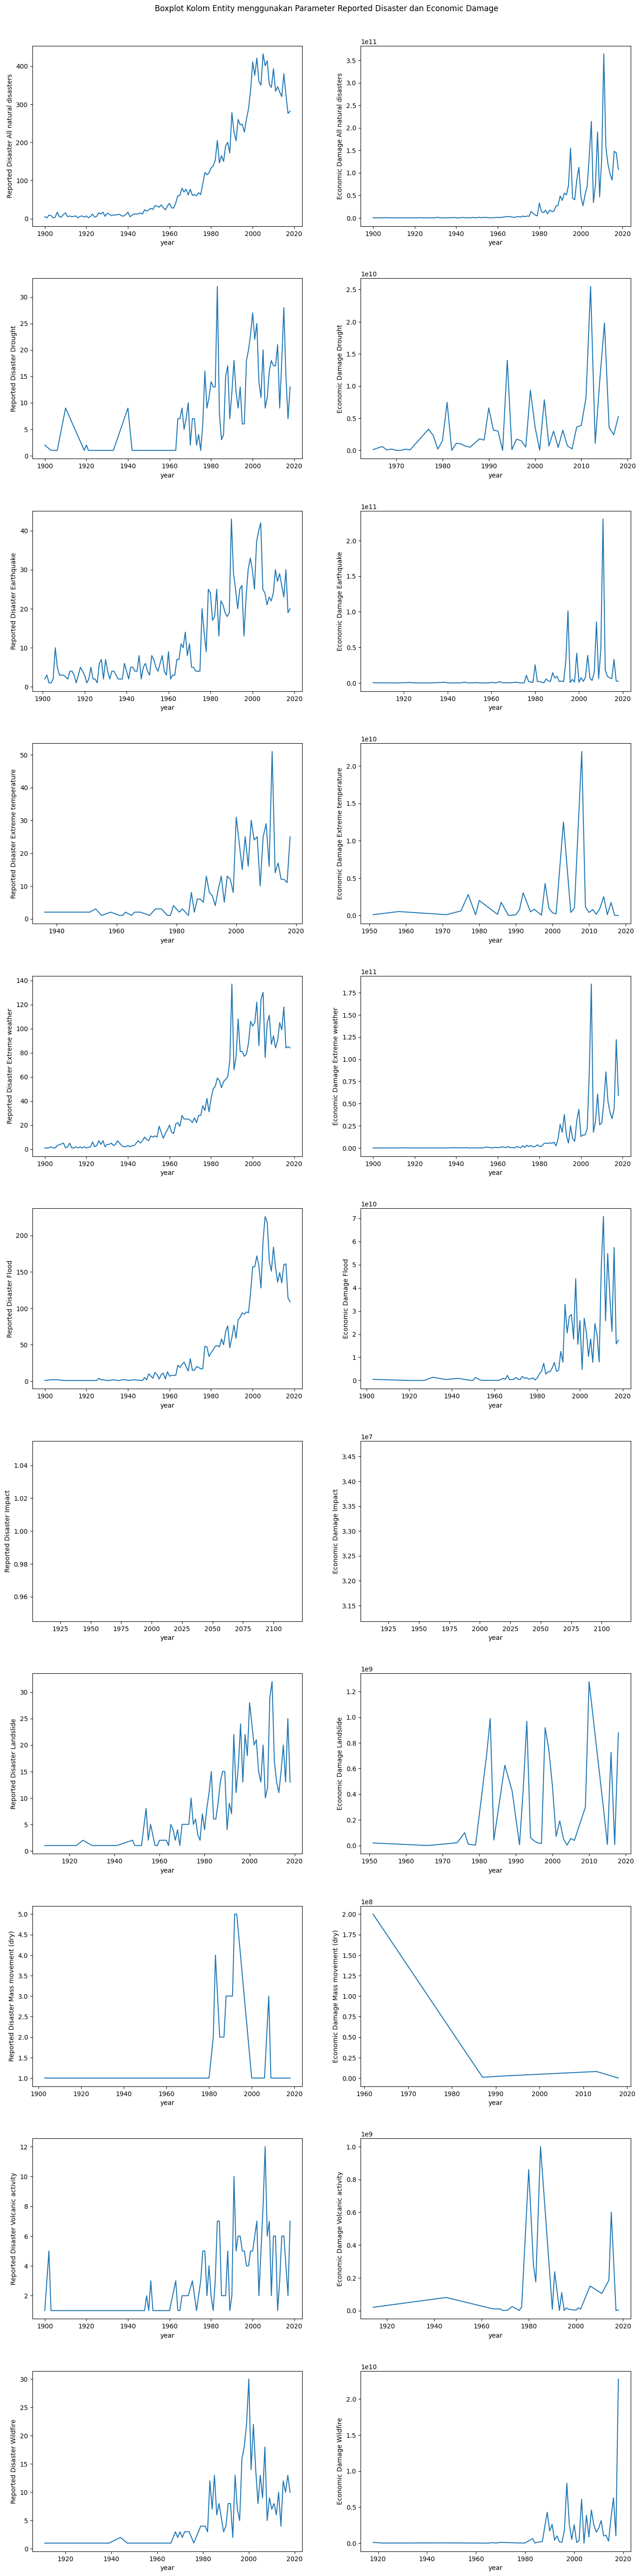

In [ ]:
#Membuat Boxplot dengan ukuran 6 baris dan 2 kolom
fig, axes = plt.subplots(11, 2, figsize=(15,56))
fig.tight_layout(pad=6)

#Menambahkan judul utama (super title)
fig.suptitle('Boxplot Kolom Entity menggunakan Parameter Reported Disaster dan Economic Damage', y=1)

#Membuat Lineplot berdasarkan kolom Entity
sns.lineplot(ax=axes[0,0], data=df[df['entity']=='All natural disasters'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[0,1], data=df[df['entity']=='All natural disasters'], x='year', y='economic_damage')
sns.lineplot(ax=axes[1,0], data=df[df['entity']=='Drought'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[1,1], data=df[df['entity']=='Drought'], x='year', y='economic_damage')
sns.lineplot(ax=axes[2,0], data=df[df['entity']=='Earthquake'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[2,1], data=df[df['entity']=='Earthquake'], x='year', y='economic_damage')
sns.lineplot(ax=axes[3,0], data=df[df['entity']=='Extreme temperature'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[3,1], data=df[df['entity']=='Extreme temperature'], x='year', y='economic_damage')
sns.lineplot(ax=axes[4,0], data=df[df['entity']=='Extreme weather'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[4,1], data=df[df['entity']=='Extreme weather'], x='year', y='economic_damage')
sns.lineplot(ax=axes[5,0], data=df[df['entity']=='Flood'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[5,1], data=df[df['entity']=='Flood'], x='year', y='economic_damage')
sns.lineplot(ax=axes[6,0], data=df[df['entity']=='Impact'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[6,1], data=df[df['entity']=='Impact'], x='year', y='economic_damage')
sns.lineplot(ax=axes[7,0], data=df[df['entity']=='Landslide'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[7,1], data=df[df['entity']=='Landslide'], x='year', y='economic_damage')
sns.lineplot(ax=axes[8,0], data=df[df['entity']=='Mass movement (dry)'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[8,1], data=df[df['entity']=='Mass movement (dry)'], x='year', y='economic_damage')
sns.lineplot(ax=axes[9,0], data=df[df['entity']=='Volcanic activity'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[9,1], data=df[df['entity']=='Volcanic activity'], x='year', y='economic_damage')
sns.lineplot(ax=axes[10,0], data=df[df['entity']=='Wildfire'], x='year', y='reported_disaster')
sns.lineplot(ax=axes[10,1], data=df[df['entity']=='Wildfire'], x='year', y='economic_damage')


#Memberi Label pada Lineplot
axes[0,0].set(ylabel='Reported Disaster All natural disasters')
axes[0,1].set(ylabel='Economic Damage All natural disasters')
axes[1,0].set(ylabel='Reported Disaster Drought')
axes[1,1].set(ylabel='Economic Damage Drought')
axes[2,0].set(ylabel='Reported Disaster Earthquake')
axes[2,1].set(ylabel='Economic Damage Earthquake')
axes[3,0].set(ylabel='Reported Disaster Extreme temperature')
axes[3,1].set(ylabel='Economic Damage Extreme temperature')
axes[4,0].set(ylabel='Reported Disaster Extreme weather')
axes[4,1].set(ylabel='Economic Damage Extreme weather')
axes[5,0].set(ylabel='Reported Disaster Flood')
axes[5,1].set(ylabel='Economic Damage Flood')
axes[6,0].set(ylabel='Reported Disaster Impact')
axes[6,1].set(ylabel='Economic Damage Impact')
axes[7,0].set(ylabel='Reported Disaster Landslide')
axes[7,1].set(ylabel='Economic Damage Landslide')
axes[8,0].set(ylabel='Reported Disaster Mass movement (dry)')
axes[8,1].set(ylabel='Economic Damage Mass movement (dry)')
axes[9,0].set(ylabel='Reported Disaster Volcanic activity')
axes[9,1].set(ylabel='Economic Damage Volcanic activity')
axes[10,0].set(ylabel='Reported Disaster Wildfire')
axes[10,1].set(ylabel='Economic Damage Wildfire')
plt.show()

Lineplot untuk semua kolom entity dengan parameter Reported Disaster dan Economic Damage, dalam waktu ke waktu bersifat fluktuatif, untuk entity impact tidak dapat terlihat garis lineplotnya, hal ini disebabkan karena hanya berisi 1 data.

In [ ]:
# Menampilkan Korelasi antar Variabel
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
corr

year  reported_disaster  economic_damage
year               1.000000           0.371459         0.319331
reported_disaster  0.371459           1.000000         0.698401
economic_damage    0.319331           0.698401         1.000000

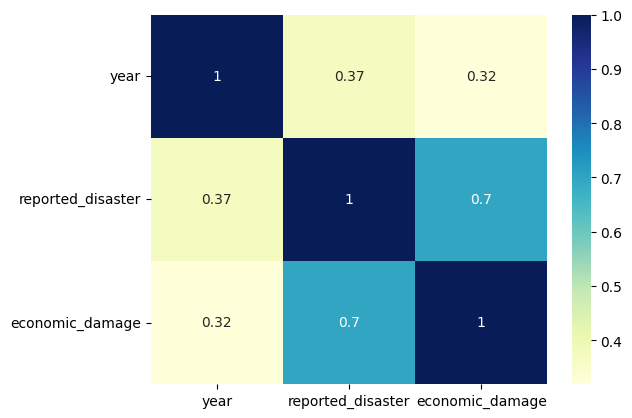

In [ ]:
# Filter DataFrame untuk hanya kolom-kolom numerik
numeric_df = df.select_dtypes(include='number')

# Hitung matriks korelasi
corr = numeric_df.corr()

# Buat heatmap dari matriks korelasi
heatmap = sns.heatmap(corr, annot=True, cmap="YlGnBu")

# Tampilkan plot heatmap
plt.show()


In [ ]:
df

year_date  year                 entity  reported_disaster   
0   1900-01-01  1900  All natural disasters                  5  \
1   1901-01-01  1901  All natural disasters                  2   
2   1902-01-01  1902  All natural disasters                  9   
3   1903-01-01  1903  All natural disasters                  8   
4   1904-01-01  1904  All natural disasters                  2   
5   1905-01-01  1905  All natural disasters                  4   
6   1906-01-01  1906  All natural disasters                 17   
7   1907-01-01  1907  All natural disasters                  5   
8   1908-01-01  1908  All natural disasters                  4   
9   1909-01-01  1909  All natural disasters                 11   
10  1910-01-01  1910  All natural disasters                 15   
11  1911-01-01  1911  All natural disasters                  5   
12  1912-01-01  1912  All natural disasters                  7   
13  1913-01-01  1913  All natural disasters                  5   
14  1914-01-01  1914  All natural disasters                  6   
15  1915-01-01  1915  All natural disasters                  7   
16  1916-01-01  1916  All natural disasters                  2   
17  1917-01-01  1917  All natural disasters                  6   
18  1918-01-01  1918  All natural disasters                  7   
19  1919-01-01  1919  All natural disasters                  4   
20  1920-01-01  1920  All natural disasters                  7   
21  1921-01-01  1921  All natural disasters                  2   
22  1922-01-01  1922  All natural disasters                  6   
23  1923-01-01  1923  All natural disasters                 12   
24  1924-01-01  1924  All natural disasters                  4   
25  1925-01-01  1925  All natural disasters                  6   
26  1926-01-01  1926  All natural disasters                 15   
27  1927-01-01  1927  All natural disasters                 12   
28  1928-01-01  1928  All natural disasters                 17   
29  1929-01-01  1929  All natural disasters                  6   
30  1930-01-01  1930  All natural disasters                 14   
31  1931-01-01  1931  All natural disasters                 12   
32  1932-01-01  1932  All natural disasters                  8   
33  1933-01-01  1933  All natural disasters                 10   
34  1934-01-01  1934  All natural disasters                  9   
35  1935-01-01  1935  All natural disasters                 11   
36  1936-01-01  1936  All natural disasters                 11   
37  1937-01-01  1937  All natural disasters                  7   
38  1938-01-01  1938  All natural disasters                  7   
39  1939-01-01  1939  All natural disasters                 11   
40  1940-01-01  1940  All natural disasters                 17   
41  1941-01-01  1941  All natural disasters                  5   
42  1942-01-01  1942  All natural disasters                  9   
43  1943-01-01  1943  All natural disasters                 12   
44  1944-01-01  1944  All natural disasters                 12   
45  1945-01-01  1945  All natural disasters                 12   
46  1946-01-01  1946  All natural disasters                 15   
47  1947-01-01  1947  All natural disasters                 12   
48  1948-01-01  1948  All natural disasters                 23   
49  1949-01-01  1949  All natural disasters                 20   
50  1950-01-01  1950  All natural disasters                 23   
51  1951-01-01  1951  All natural disasters                 27   
52  1952-01-01  1952  All natural disasters                 24   
53  1953-01-01  1953  All natural disasters                 34   
54  1954-01-01  1954  All natural disasters                 33   
55  1955-01-01  1955  All natural disasters                 30   
56  1956-01-01  1956  All natural disasters                 36   
57  1957-01-01  1957  All natural disasters                 29   
58  1958-01-01  1958  All natural disasters                 23   
59  1959-01-01  1959  All natural disasters  

In [ ]:
df_not_null= df.dropna().reset_index(drop=True)
df_not_null

year_date  year                 entity  reported_disaster   
0   1900-01-01  1900  All natural disasters                  5  \
1   1901-01-01  1901  All natural disasters                  2   
2   1902-01-01  1902  All natural disasters                  9   
3   1903-01-01  1903  All natural disasters                  8   
4   1904-01-01  1904  All natural disasters                  2   
5   1905-01-01  1905  All natural disasters                  4   
6   1906-01-01  1906  All natural disasters                 17   
7   1907-01-01  1907  All natural disasters                  5   
8   1908-01-01  1908  All natural disasters                  4   
9   1909-01-01  1909  All natural disasters                 11   
10  1910-01-01  1910  All natural disasters                 15   
11  1911-01-01  1911  All natural disasters                  5   
12  1912-01-01  1912  All natural disasters                  7   
13  1913-01-01  1913  All natural disasters                  5   
14  1914-01-01  1914  All natural disasters                  6   
15  1915-01-01  1915  All natural disasters                  7   
16  1916-01-01  1916  All natural disasters                  2   
17  1917-01-01  1917  All natural disasters                  6   
18  1918-01-01  1918  All natural disasters                  7   
19  1919-01-01  1919  All natural disasters                  4   
20  1920-01-01  1920  All natural disasters                  7   
21  1921-01-01  1921  All natural disasters                  2   
22  1922-01-01  1922  All natural disasters                  6   
23  1923-01-01  1923  All natural disasters                 12   
24  1924-01-01  1924  All natural disasters                  4   
25  1925-01-01  1925  All natural disasters                  6   
26  1926-01-01  1926  All natural disasters                 15   
27  1927-01-01  1927  All natural disasters                 12   
28  1928-01-01  1928  All natural disasters                 17   
29  1929-01-01  1929  All natural disasters                  6   
30  1930-01-01  1930  All natural disasters                 14   
31  1931-01-01  1931  All natural disasters                 12   
32  1932-01-01  1932  All natural disasters                  8   
33  1933-01-01  1933  All natural disasters                 10   
34  1934-01-01  1934  All natural disasters                  9   
35  1935-01-01  1935  All natural disasters                 11   
36  1936-01-01  1936  All natural disasters                 11   
37  1937-01-01  1937  All natural disasters                  7   
38  1938-01-01  1938  All natural disasters                  7   
39  1939-01-01  1939  All natural disasters                 11   
40  1940-01-01  1940  All natural disasters                 17   
41  1941-01-01  1941  All natural disasters                  5   
42  1942-01-01  1942  All natural disasters                  9   
43  1943-01-01  1943  All natural disasters                 12   
44  1944-01-01  1944  All natural disasters                 12   
45  1945-01-01  1945  All natural disasters                 12   
46  1946-01-01  1946  All natural disasters                 15   
47  1947-01-01  1947  All natural disasters                 12   
48  1948-01-01  1948  All natural disasters                 23   
49  1949-01-01  1949  All natural disasters                 20   
50  1950-01-01  1950  All natural disasters                 23   
51  1951-01-01  1951  All natural disasters                 27   
52  1952-01-01  1952  All natural disasters                 24   
53  1953-01-01  1953  All natural disasters                 34   
54  1954-01-01  1954  All natural disasters                 33   
55  1955-01-01  1955  All natural disasters                 30   
56  1956-01-01  1956  All natural disasters                 36   
57  1957-01-01  1957  All natural disasters                 29   
58  1958-01-01  1958  All natural disasters                 23   
59  1959-01-01  1959  All natural disasters  

In [ ]:
df_natural_disaster_base = df_not_null[df_not_null['entity'] != 'All natural disasters'].reset_index(drop=True)
df_natural_disaster_base

year_date  year               entity  reported_disaster  economic_damage
0   1965-01-01  1965              Drought                  7     1.271180e+08
1   1967-01-01  1967              Drought                  5     6.002000e+08
2   1968-01-01  1968              Drought                  7     6.400000e+07
3   1969-01-01  1969              Drought                 10     2.150000e+08
4   1970-01-01  1970              Drought                  2     2.100000e+06
5   1971-01-01  1971              Drought                  7     3.900000e+06
6   1972-01-01  1972              Drought                  7     1.870000e+08
7   1973-01-01  1973              Drought                  2     7.600000e+07
8   1977-01-01  1977              Drought                 16     3.300000e+09
9   1978-01-01  1978              Drought                  9     2.326700e+09
10  1979-01-01  1979              Drought                 11     2.000000e+08
11  1980-01-01  1980              Drought                 14     1.500000e+09
12  1981-01-01  1981              Drought                 13     7.460000e+09
13  1982-01-01  1982              Drought                 13     1.000000e+06
14  1983-01-01  1983              Drought                 32     1.113954e+09
15  1984-01-01  1984              Drought                  8     1.000000e+09
16  1985-01-01  1985              Drought                  3     6.510000e+08
17  1986-01-01  1986              Drought                  4     5.000000e+08
18  1988-01-01  1988              Drought                 17     1.801287e+09
19  1989-01-01  1989              Drought                  7     1.600000e+09
20  1990-01-01  1990              Drought                 12     6.601739e+09
21  1991-01-01  1991              Drought                 18     3.159000e+09
22  1992-01-01  1992              Drought                 12     2.991800e+09
23  1993-01-01  1993              Drought                  9     2.000000e+06
24  1994-01-01  1994              Drought                 13     1.399520e+10
25  1995-01-01  1995              Drought                  6     1.128000e+08
26  1996-01-01  1996              Drought                  6     1.742400e+09
27  1997-01-01  1997              Drought                 18     1.515100e+09
28  1998-01-01  1998              Drought                 20     5.132000e+08
29  1999-01-01  1999              Drought                 23     9.347000e+09
30  2000-01-01  2000              Drought                 27     3.655165e+09
31  2001-01-01  2001              Drought                 22     3.640000e+07
32  2002-01-01  2002              Drought                 25     7.871475e+09
33  2003-01-01  2003              Drought                 14     6.910000e+08
34  2004-01-01  2004              Drought                 11     2.991275e+09
35  2005-01-01  2005              Drought                 20     4.621200e+08
36  2006-01-01  2006              Drought                  9     3.135573e+09
37  2007-01-01  2007              Drought                 11     7.060000e+08
38  2008-01-01  2008              Drought                 16     2.340000e+08
39  2009-01-01  2009              Drought                 18     3.628700e+09
40  2010-01-01  2010              Drought                 17     3.884700e+09
41  2011-01-01  2011              Drought                 17     8.142000e+09
42  2012-01-01  2012              Drought                 21     2.548000e+10
43  2013-01-01  2013              Drought                  9     1.087000e+09
44  2014-01-01  2014              Drought                 18     1.100500e+10
45  2015-01-01  2015              Drought                 28     1.981240e+10
46  2016-01-01  2016              Drought                 15     3.554000e+09
47  2017-01-01  2017              Drought                  7     2.422000e+09
48  2018-01-01  2018              Drought                 13     5.253669e+09
49  1906-01-01  1906           Earthquake                 10     6.307500e+08
50  1907-01-01  1907       

In [ ]:
df_natural_disaster_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_date          442 non-null    datetime64[ns]
 1   year               442 non-null    int64         
 2   entity             442 non-null    object        
 3   reported_disaster  442 non-null    int64         
 4   economic_damage    442 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 17.4+ KB


In [ ]:
df_pivot= pd.pivot(df_natural_disaster_base, index='year_date', columns='entity', values=['reported_disaster','economic_damage']).fillna(0)
df_pivot

reported_disaster                                                  
entity               Drought Earthquake Extreme temperature Extreme weather   
year_date                                                                     
1900-01-01               0.0        0.0                 0.0             1.0  \
1903-01-01               0.0        0.0                 0.0             0.0   
1906-01-01               0.0       10.0                 0.0             3.0   
1907-01-01               0.0        5.0                 0.0             0.0   
1908-01-01               0.0        3.0                 0.0             0.0   
1911-01-01               0.0        0.0                 0.0             2.0   
1912-01-01               0.0        0.0                 0.0             5.0   
1913-01-01               0.0        0.0                 0.0             1.0   
1914-01-01               0.0        0.0                 0.0             0.0   
1915-01-01               0.0        3.0                 0.0             2.0   
1917-01-01               0.0        0.0                 0.0             2.0   
1918-01-01               0.0        5.0                 0.0             0.0   
1919-01-01               0.0        0.0                 0.0             2.0   
1920-01-01               0.0        0.0                 0.0             0.0   
1922-01-01               0.0        0.0                 0.0             0.0   
1923-01-01               0.0        5.0                 0.0             6.0   
1925-01-01               0.0        2.0                 0.0             3.0   
1926-01-01               0.0        0.0                 0.0             7.0   
1927-01-01               0.0        6.0                 0.0             4.0   
1928-01-01               0.0        0.0                 0.0             7.0   
1929-01-01               0.0        0.0                 0.0             2.0   
1930-01-01               0.0        0.0                 0.0             4.0   
1931-01-01               0.0        4.0                 0.0             4.0   
1932-01-01               0.0        0.0                 0.0             5.0   
1933-01-01               0.0        4.0                 0.0             3.0   
1934-01-01               0.0        0.0                 0.0             4.0   
1935-01-01               0.0        0.0                 0.0             7.0   
1936-01-01               0.0        0.0                 0.0             5.0   
1937-01-01               0.0        0.0                 0.0             0.0   
1938-01-01               0.0        0.0                 0.0             2.0   
1939-01-01               0.0        6.0                 0.0             0.0   
1940-01-01               0.0        4.0                 0.0             0.0   
1942-01-01               0.0        5.0                 0.0             0.0   
1943-01-01               0.0        5.0                 0.0             0.0   
1944-01-01               0.0        0.0                 0.0             5.0   
1945-01-01               0.0        0.0                 0.0             7.0   
1946-01-01               0.0        8.0                 0.0             5.0   
1947-01-01               0.0        0.0                 0.0             7.0   
1948-01-01               0.0        5.0                 0.0            10.0   
1949-01-01               0.0        6.0                 0.0             0.0   
1950-01-01               0.0        0.0                 0.0             7.0   
1951-01-01               0.0        3.0                 2.0            11.0   
1952-01-01               0.0        8.0                 0.0            10.0   
1953-01-01               0.0        7.0                 0.0            11.0   
1954-01-01               0.0        5.0                 0.0            10.0   
1955-01-01               0.0        0.0                 0.0            19.0   
1956-01-01               0.0        6.0                 0.0             0.0   
1957-01-01               0.0        8.0                 0.0  

In [ ]:
# Mengubah kolom year_date menjadi index

df_natural_disaster_base = df_natural_disaster_base.set_index('year_date')
df_not_null= df_not_null.set_index('year_date')

In [ ]:
# Membuat Resample dari DataFrame yang tidak terdapat nan
df_resample = df_not_null.select_dtypes(include=[np.number]).resample('1Y').mean()
df_resample

year  reported_disaster  economic_damage
year_date                                             
1900-12-31  1900.0           3.000000     3.000000e+07
1901-12-31  1901.0           2.000000     0.000000e+00
1902-12-31  1902.0           9.000000     0.000000e+00
1903-12-31  1903.0           5.000000     4.800000e+08
1904-12-31  1904.0           2.000000     0.000000e+00
1905-12-31  1905.0           4.000000     0.000000e+00
1906-12-31  1906.0          10.000000     4.338333e+08
1907-12-31  1907.0           5.000000     3.000000e+07
1908-12-31  1908.0           3.500000     1.160000e+08
1909-12-31  1909.0          11.000000     0.000000e+00
1910-12-31  1910.0          15.000000     0.000000e+00
1911-12-31  1911.0           3.500000     2.000000e+07
1912-12-31  1912.0           6.000000     3.500000e+07
1913-12-31  1913.0           3.000000     2.000000e+08
1914-12-31  1914.0           3.500000     2.000000e+07
1915-12-31  1915.0           4.000000     8.066667e+07
1916-12-31  1916.0           2.000000     0.000000e+00
1917-12-31  1917.0           4.000000     5.000000e+07
1918-12-31  1918.0           4.333333     8.600000e+07
1919-12-31  1919.0           3.000000     2.500000e+07
1920-12-31  1920.0           4.000000     2.000000e+07
1921-12-31  1921.0           2.000000     0.000000e+00
1922-12-31  1922.0           3.500000     8.000000e+06
1923-12-31  1923.0           7.666667     4.066667e+08
1924-12-31  1924.0           4.000000     0.000000e+00
1925-12-31  1925.0           3.000000     2.250000e+07
1926-12-31  1926.0           8.666667     6.933333e+07
1927-12-31  1927.0           6.000000     5.111500e+07
1928-12-31  1928.0          12.000000     7.500000e+07
1929-12-31  1929.0           4.000000     5.500000e+07
1930-12-31  1930.0           9.000000     4.000000e+07
1931-12-31  1931.0           5.250000     7.237500e+08
1932-12-31  1932.0           6.500000     3.000000e+07
1933-12-31  1933.0           5.666667     4.433333e+07
1934-12-31  1934.0           6.500000     5.000000e+07
1935-12-31  1935.0           9.000000     8.000000e+06
1936-12-31  1936.0           8.000000     2.100000e+07
1937-12-31  1937.0           4.500000     4.380000e+08
1938-12-31  1938.0           4.500000     3.060000e+08
1939-12-31  1939.0           8.500000     9.400000e+08
1940-12-31  1940.0          10.500000     4.300000e+07
1941-12-31  1941.0           5.000000     0.000000e+00
1942-12-31  1942.0           7.000000     2.800000e+07
1943-12-31  1943.0           6.333333     6.666667e+08
1944-12-31  1944.0           8.500000     1.000000e+08
1945-12-31  1945.0           6.666667     3.200000e+08
1946-12-31  1946.0           9.333333     1.700000e+07
1947-12-31  1947.0           6.666667     8.666667e+07
1948-12-31  1948.0          12.666667     6.953333e+08
1949-12-31  1949.0           9.333333     1.061333e+08
1950-12-31  1950.0          13.333333     1.340000e+08
1951-12-31  1951.0           8.500000     5.094167e+08
1952-12-31  1952.0          14.000000     1.019333e+08
1953-12-31  1953.0          16.000000     4.921550e+08
1954-12-31  1954.0          14.250000     4.435000e+08
1955-12-31  1955.0          24.500000     8.770000e+08
1956-12-31  1956.0          21.000000     2.500000e+07
1957-12-31  1957.0          15.333333     1.166667e+08
1958-12-31  1958.0           9.666667     3.534000e+08
1959-12-31  1959.0          17.333333     4.654667e+08
1960-12-31  1960.0          23.000000     8.426940e+08
1961-12-31  1961.0          21.000000     4.804000e+08
1962-12-31  1962.0          10.600000     6.116000e+08
1963-12-31  1963.0          21.666667     1.146060e+09
1964-12-31  1964.0          27.750000     1.560175e+09
1965-12-31  1965.0          16.428571     7.221766e+08
1966-12-31  1966.0          29.200000     1.147532e+09
1967-12-31  1967.0          23.000000     5.079420e+08
1968-12-31  1968.0          21.142857     2.920680e+08
1969-12-31  1969.0          20.166667     7.967663e+08
1970-12-31  1970.0          24.666667     1.025531e+09

## Inferential Statistics

Mencari Persamaan Regresi Linear, R-score, dan P value.


*   R square merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen mempengaruhi variabel dependen. R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen.([Source](https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/))
*   Nilai P dikenal sebagai nilai probabilitas. Hal ini didefinisikan sebagai probabilitas untuk mendapatkan hasil yang sama atau lebih ekstrim dari observasi sebenarnya. Nilai P dikenal sebagai tingkat signifikansi marjinal dalam pengujian hipotesis yang mewakili kemungkinan terjadinya peristiwa tertentu. ([Source](https://byjus.com/maths/p-value/))




### Year dan Reported Disaster

In [ ]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1900-01-01 to 2018-01-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               561 non-null    int64  
 1   entity             561 non-null    object 
 2   reported_disaster  561 non-null    int64  
 3   economic_damage    561 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 21.9+ KB


In [ ]:
df_natural_disaster_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 1965-01-01 to 2018-01-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               442 non-null    int64  
 1   entity             442 non-null    object 
 2   reported_disaster  442 non-null    int64  
 3   economic_damage    442 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


In [ ]:
# Import modul stats dari pustaka SciPy
import scipy.stats as stats

# Mengecek Hasil Regresi Linear
result = stats.linregress(df_natural_disaster_base['year'], df_natural_disaster_base['reported_disaster'])
print('Persamaan regresi linear: y =', str(result.slope) + 'x', '+(' + str(result.intercept) + ')')

# Mencetak Hasil R-Score
print('Nilai R-score: ', result.rvalue)

# Mencetak Hasil P-Value
print('Nilai P-value: ', result.pvalue)

Persamaan regresi linear: y = 0.5598936975281738x +(-1081.766399586059)
Nilai R-score:  0.39330642434777596
Nilai P-value:  8.38591364894501e-18


Mencari Persamaan Regresi Linear dari variavel independen  `year` dan Variabel dependen `reported_disaster` dari data yang sudah diresample menjadi tahunan.

In [ ]:
result_resample = stats.linregress(df_resample['year'], df_resample['reported_disaster'])
print('Persamaan regresi linear: y =', str(result_resample.slope) + 'x', '+ (' + str(result_resample.intercept) + ')')
print('Nilai R-score: ', result_resample.rvalue)
print('Nilai p-value: ', result_resample.pvalue)

Persamaan regresi linear: y = 0.7941361940256327x + (-1524.7243720567321)
Nilai R-score:  0.8717837386534785
Nilai p-value:  4.6450879058493577e-38


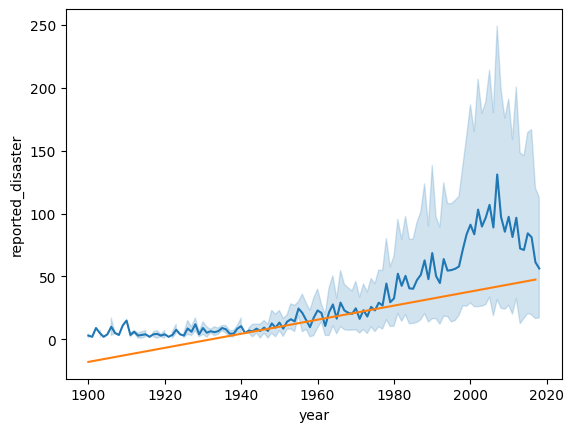

In [ ]:
import numpy as np

X = np.arange(1900, 2018)
Y = result.slope * X + result.intercept

sns.lineplot(data=df_not_null, x='year', y='reported_disaster')
sns.lineplot(x=X, y=Y)
plt.show()

Fekuensi Reported Disaster mengalami penurunan dan kenaikan setiap tahun (fluktuatif).

### Year dan Economic Damage

In [ ]:
# Import modul stats dari pustaka SciPy
import scipy.stats as stats

# Mengecek Hasil Regresi Linear
result = stats.linregress(df_natural_disaster_base['year'], df_natural_disaster_base['economic_damage'])
print('Persamaan regresi linear: y =', str(result.slope) + 'x', '+(' + str(result.intercept) + ')')

# Mencetak Hasil R-Score
print('Nilai R-score: ', result.rvalue)

# Mencetak Hasil P-Value
print('Nilai P-value: ', result.pvalue)

Persamaan regresi linear: y = 217722598.944407x +(-424273967334.835)
Nilai R-score:  0.2955030330227163
Nilai P-value:  2.341761650556695e-10


Mencari Persamaan Regresi Linear dari variavel independen  `year` dan Variabel dependen `economic_damage` dari data yang sudah diresample menjadi tahunan.

In [ ]:
# Mengecek Hasil Rgresi dari Dataframe yang sudah di resample
result_resample = stats.linregress(df_resample['year'], df_resample['economic_damage'])
print('Persamaan regresi linear: y =', str(result_resample.slope) + 'x', '+ (' + str(result_resample.intercept) + ')')
print('Nilai R-score: ', result_resample.rvalue)
print('Nilai p-value: ', result_resample.pvalue)

Persamaan regresi linear: y = 257764039.9619057x + (-498077650141.74243)
Nilai R-score:  0.6411194079547381
Nilai p-value:  4.028756320357616e-15


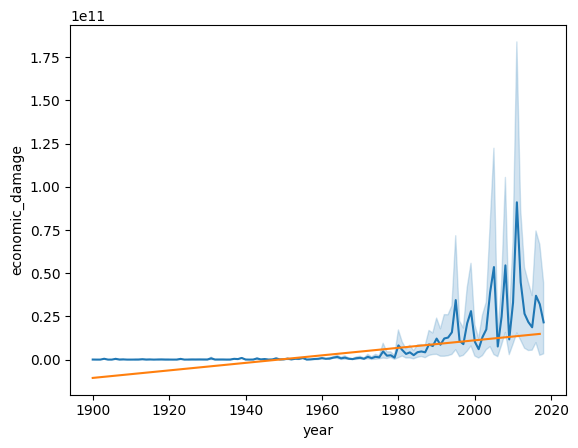

In [ ]:
import numpy as np

X = np.arange(1900, 2018)
Y = result.slope * X + result.intercept

sns.lineplot(data=df_not_null, x='year', y='economic_damage')
sns.lineplot(x=X, y=Y)
plt.show()

Economic Damage mengalami penurunan dan kenaikan setiap tahun (fluktuatif).

In [ ]:
# Memprediksi economic damage berdasarkan tahun (year)
def forecast_economic_damage(year):
    return result_resample.slope * year + result_resample.intercept

forecast_economic_damage(2030)

25183350980.926086

1.   Year dan Reported Disaster

        *   Sebelum Resample Per-tahun:

            - Persamaan regresi linear: y = 0.5598936975281738x +(-1081.766399586059)
            
            - Nilai R-score: 0.39330642434777596
            
            - Nilai P-value: 8.38591364894501e-18

        *   Setelah Resample Per-tahun:

            - Persamaan regresi linear: y = 0.7941361940256327x + (-1524.7243720567321)
            
            - Nilai R-score:  0.8717837386534785
            - Nilai p-value:  4.6450879058493577e-38

      Dapat diketahui dari Variabel independen yaitu `year` dan Variabel dependen `reported_disaster` persamaan Regresi Linear dari data yang sudah di resample menjadi tahunan dihasilkan Persamaan regresi linear: y = 0.7941361940256327x + (-1524.7243720567321)

      Kemudian nilai R-Score pada data yang sudah diresample lebih tinggi, dihasilkan nilai sebesar 0.8717 (87,17%) dibandingkan dengan nilai R-Score sebelum diresample yaitu 0.3933 (39,33%), hal ini menunjukkan data setelah di resample menunjukkan model regresi variabelitas dalam data sangat baik.

      Dan P-value yang dihasilkan oleh data yang sudah di resample lebih kecil dibandingkan dengan data sebelum di resample. Pvalue menunjukkan nilai 4.6450879058493577e-38 dan lebih kecil dari alpha (0.05), maka H0 di tolak sehingga menunjukkan adanya hubungan yang signifikan antara variabel independen dan variabel dependen.

      Dapat disimpulkan hubungan antara `year` dan `reported_disaster` terdapat hubungan yang sangat signifikan secara statisik hal ini dapat menggambarkan adanya pengaruh yang kuat pada waktu terhadap rata-rata yang lebih stabil atau tren jangka panjang dalam pada musim.


2.   Year dan Economic Damage

      *   Sebelum Resample Per-tahun:
          - Persamaan regresi linear: y = 217722598.944407x +(-424273967334.835)
          - Nilai R-score:  0.2955030330227163
          - Nilai P-value:  2.341761650556695e-10

      *   Setelah Resample Per-tahun:
          - Persamaan regresi linear: y = 257764039.9619057x + (-498077650141.74243)
          - R-score: 0.6411194079547381
          - p-value: 4.028756320357616e-15

      Dapat diketahui dari Variabel independen yaitu `year` dan Variabel dependen `economic_damage` persamaan Regresi Linear dari data yang sudah di resample menjadi tahunan dihasilkan Persamaan regresi linear: y = 257764039.9619057x + (-498077650141.74243)

      Kemudian nilai R-Score pada data yang sudah diresample lebih tinggi, dihasilkan nilai sebesar 0.6411 (64,11%) dibandingkan dengan nilai R-Score sebelum diresample yaitu 0.2955 (29,55%), hal ini menunjukkan data setelah di resample menunjukkan model regresi variabelitas dalam data sangat baik.

      Dan P-value yang dihasilkan oleh data yang sudah di resample lebih kecil dibandingkan dengan data sebelum di resample. Pvalue menunjukkan nilai 4.028756320357616e-15 dan lebih kecil dari alpha (0.05), maka H0 di tolak sehingga menunjukkan adanya hubungan yang signifikan antara variabel independen dan variabel dependen.

      Dapat disimpulkan hubungan antara `year` dan `economic_damage` terdapat hubungan yang sangat signifikan secara statisik hal ini dapat menggambarkan adanya pengaruh yang kuat pada waktu terhadap rata-rata yang lebih stabil atau tren jangka panjang dalam pada musim.


## Statistical Modeling

<Axes: xlabel='year', ylabel='economic_damage'>

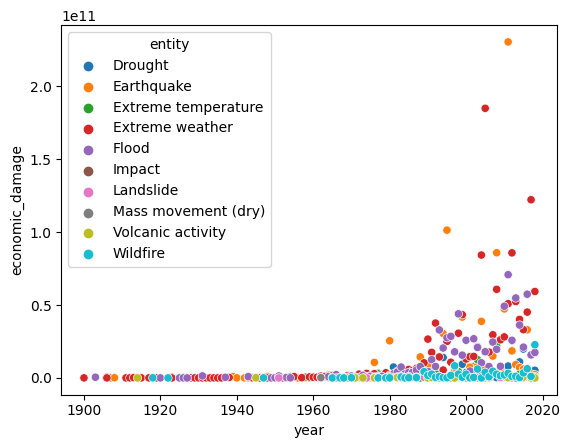

In [ ]:
#Scatterplot visualisasi
sns.scatterplot(data=df_natural_disaster_base, x='year', y='economic_damage', hue='entity')

Dapat terlihat untuk variabel economic damage pada setiap variabel entity terlihat persebarannya, tetapi terdapat outlier pada entity earthquake, extreme weather.

<Axes: xlabel='year', ylabel='reported_disaster'>

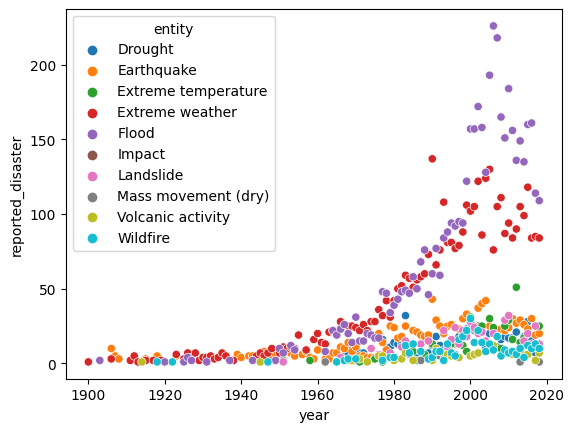

In [ ]:
#Scatterplot visualisasi
sns.scatterplot(data=df_natural_disaster_base, x='year', y='reported_disaster', hue='entity')

Dapat terlihat untuk variabel reported disaster pada setiap variabel entity terlihat stabil, tetapi ada beberapa entity yang dominan memiliki kenaikan setiap tahunnya seperti Flood, dan Extreme Weather.

<Axes: xlabel='reported_disaster', ylabel='economic_damage'>

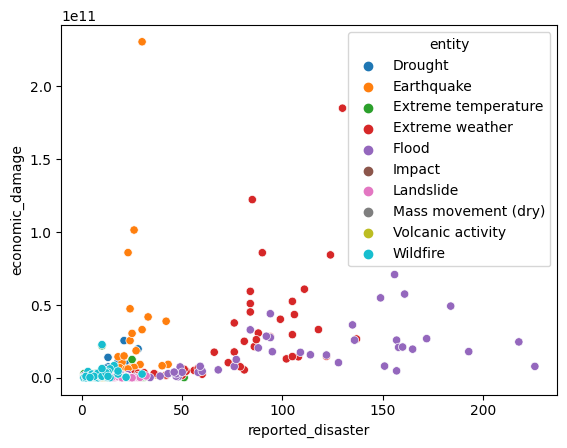

In [ ]:
#Scatterplot visualisasi
sns.scatterplot(data=df_natural_disaster_base, x='reported_disaster', y='economic_damage', hue='entity')

<Axes: xlabel='year', ylabel='economic_damage'>

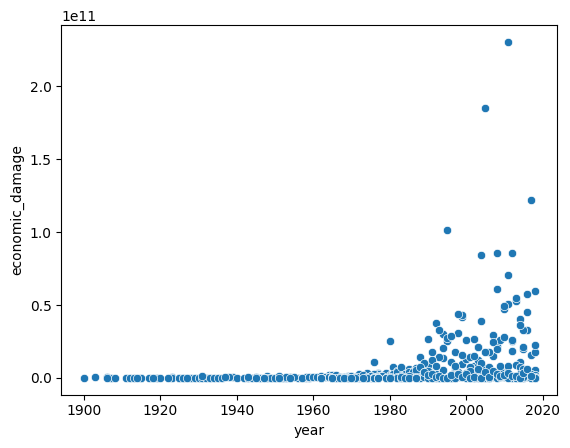

In [ ]:
# Membuat Scatterplot antara economic damage dan year
sns.scatterplot(data=df_natural_disaster_base, x='year', y='economic_damage')

<Axes: xlabel='year', ylabel='reported_disaster'>

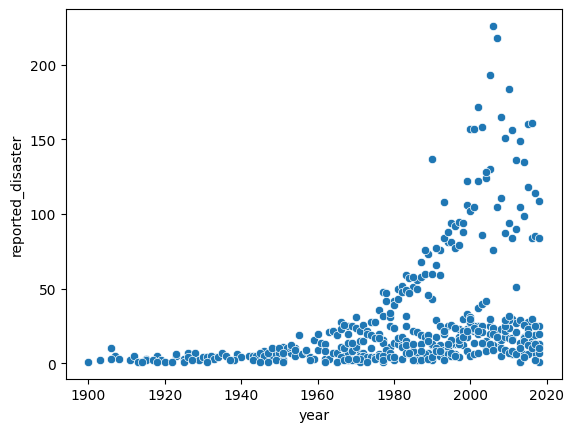

In [ ]:
sns.scatterplot(data=df_natural_disaster_base, x='year', y='reported_disaster')

<Axes: xlabel='reported_disaster', ylabel='economic_damage'>

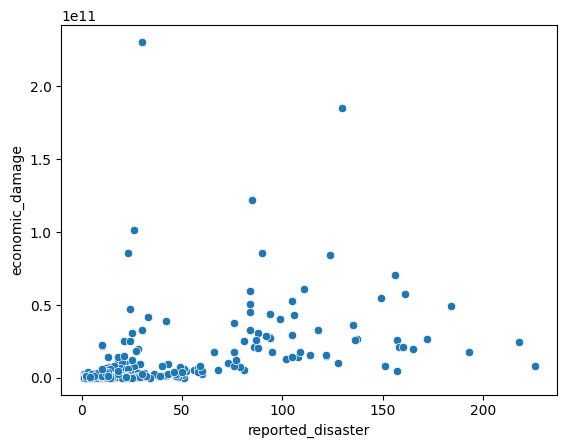

In [ ]:
sns.scatterplot(data=df_natural_disaster_base, x='reported_disaster', y='economic_damage')

In [ ]:
# Import Modul KMeans dan MinMaxScaler dari scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time

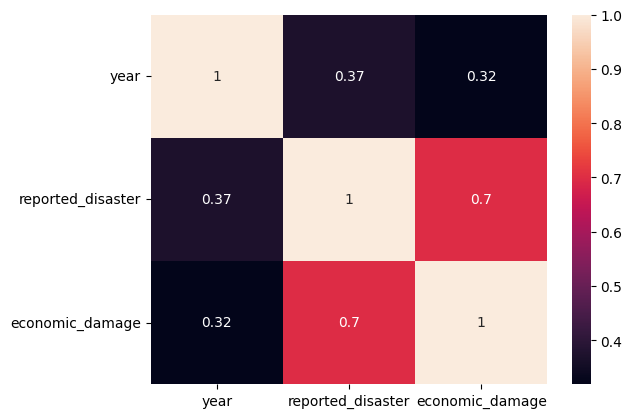

In [ ]:
# Membuat df resample
df_resample_corr =df_resample.corr()

# Membuat heatmap df resample
sns.heatmap(corr, annot=True)

# Menampilkan Plot
plt.show()

#### Elbow Method

Elbow Method merupakan metode grafis untuk mencari nilai K optimal dalam algoritma k-means clustering. Grafik elbow menunjukkan nilai-nilai dalam-cluster-sum-of-square (WCSS) pada sumbu y yang sesuai dengan nilai K yang berbeda (pada sumbu x). Nilai K optimal adalah titik dimana grafik membentuk siku.  


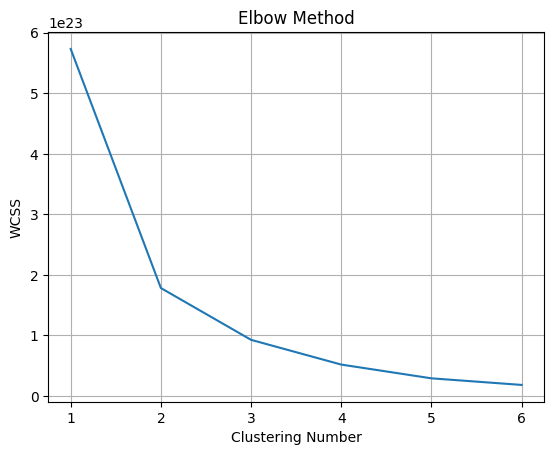

In [ ]:
# Pilih hanya kolom-kolom numerik dari DataFrame
numerical_columns = df_not_null.select_dtypes(include=[np.number])

# Ambil data dari numerical_columns sebagai nilai dari variabel X
X = numerical_columns

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Clustering Number')
plt.ylabel('WCSS')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)
plt.show()


Grafik membentuk siku tajam pada clustering number 2

In [ ]:
df_natural_disaster_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 1965-01-01 to 2018-01-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               442 non-null    int64  
 1   entity             442 non-null    object 
 2   reported_disaster  442 non-null    int64  
 3   economic_damage    442 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


In [ ]:
# Modelling K-Means clustering

kmeans = KMeans(2, n_init='auto')
kmeans.fit(df_resample)
identified_clusters = kmeans.fit_predict(df_resample)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# Hasil akhir clustering
pd.set_option('display.max_rows', None)
data_with_clusters = df_resample.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

year  reported_disaster  economic_damage  cluster
year_date                                                      
1900-12-31  1900.0           3.000000     3.000000e+07        0
1901-12-31  1901.0           2.000000     0.000000e+00        0
1902-12-31  1902.0           9.000000     0.000000e+00        0
1903-12-31  1903.0           5.000000     4.800000e+08        0
1904-12-31  1904.0           2.000000     0.000000e+00        0
1905-12-31  1905.0           4.000000     0.000000e+00        0
1906-12-31  1906.0          10.000000     4.338333e+08        0
1907-12-31  1907.0           5.000000     3.000000e+07        0
1908-12-31  1908.0           3.500000     1.160000e+08        0
1909-12-31  1909.0          11.000000     0.000000e+00        0
1910-12-31  1910.0          15.000000     0.000000e+00        0
1911-12-31  1911.0           3.500000     2.000000e+07        0
1912-12-31  1912.0           6.000000     3.500000e+07        0
1913-12-31  1913.0           3.000000     2.000000e+08        0
1914-12-31  1914.0           3.500000     2.000000e+07        0
1915-12-31  1915.0           4.000000     8.066667e+07        0
1916-12-31  1916.0           2.000000     0.000000e+00        0
1917-12-31  1917.0           4.000000     5.000000e+07        0
1918-12-31  1918.0           4.333333     8.600000e+07        0
1919-12-31  1919.0           3.000000     2.500000e+07        0
1920-12-31  1920.0           4.000000     2.000000e+07        0
1921-12-31  1921.0           2.000000     0.000000e+00        0
1922-12-31  1922.0           3.500000     8.000000e+06        0
1923-12-31  1923.0           7.666667     4.066667e+08        0
1924-12-31  1924.0           4.000000     0.000000e+00        0
1925-12-31  1925.0           3.000000     2.250000e+07        0
1926-12-31  1926.0           8.666667     6.933333e+07        0
1927-12-31  1927.0           6.000000     5.111500e+07        0
1928-12-31  1928.0          12.000000     7.500000e+07        0
1929-12-31  1929.0           4.000000     5.500000e+07        0
1930-12-31  1930.0           9.000000     4.000000e+07        0
1931-12-31  1931.0           5.250000     7.237500e+08        0
1932-12-31  1932.0           6.500000     3.000000e+07        0
1933-12-31  1933.0           5.666667     4.433333e+07        0
1934-12-31  1934.0           6.500000     5.000000e+07        0
1935-12-31  1935.0           9.000000     8.000000e+06        0
1936-12-31  1936.0           8.000000     2.100000e+07        0
1937-12-31  1937.0           4.500000     4.380000e+08        0
1938-12-31  1938.0           4.500000     3.060000e+08        0
1939-12-31  1939.0           8.500000     9.400000e+08        0
1940-12-31  1940.0          10.500000     4.300000e+07        0
1941-12-31  1941.0           5.000000     0.000000e+00        0
1942-12-31  1942.0           7.000000     2.800000e+07        0
1943-12-31  1943.0           6.333333     6.666667e+08        0
1944-12-31  1944.0           8.500000     1.000000e+08        0
1945-12-31  1945.0           6.666667     3.200000e+08        0
1946-12-31  1946.0           9.333333     1.700000e+07        0
1947-12-31  1947.0           6.666667     8.666667e+07        0
1948-12-31  1948.0          12.666667     6.953333e+08        0
1949-12-31  1949.0           9.333333     1.061333e+08        0
1950-12-31  1950.0          13.333333     1.340000e+08        0
1951-12-31  1951.0           8.500000     5.094167e+08        0
1952-12-31  1952.0          14.000000     1.019333e+08        0
1953-12-31  1953.0          16.000000     4.921550e+08        0
1954-12-31  1954.0          14.250000     4.435000e+08        0
1955-12-31  1955.0          24.500000     8.770000e+08        0
1956-12-31  1956.0          21.000000     2.500000e+07        0
1957-12-31  1957.0          15.333333     1.166667e+08        0
1958-12-31  1958.0           9.666667     3.534000e+08        0
1959-12-31  1959.0          17.333333     4.654667e+08        0
1960-12-31  1960.0          23.000000     8.42

Didapatkan Informasi tahun yang masuk kedalam kluster 0, 1, dan 2:
1. Untuk Cluster 0 :
  - Tahun 1900 Sampai Tahun 1994
  - Tahun 1996 Sampai Tahun 1997
  - Tahun 2000 Sampai Tahun 2003
  - Tahun 2006
  - Tahun 2009
  - Tahun 2015

2. Untuk Cluster 1 :
  - Tahun 1995
  - Tahun 1998
  - Tahun 1999
  - Tahun 2004
  - Tahun 2005
  - Tahun 2007
  - Tahun 2008
  - Tahun 2010 Sampai Tahun 2014
  - Tahun 2016
  - Tahun 2017
  - Tahun 2018

In [ ]:
# Melakukan Encoding
train = pd.get_dummies(df_resample)

In [ ]:
from sklearn.preprocessing import StandardScaler
import time

# Melakukan Scalling
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)

In [ ]:
train['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

# Tambahkan kolom 'cluster' ke centroids
centroids = np.c_[centroids, np.zeros(centroids.shape[0])]

# Buat DataFrame centroids_df dengan nama kolom yang sesuai
centroids_df = pd.DataFrame(centroids, columns=train.columns)

# Tambahkan kolom 'cluster' ke centroids_df
centroids_df['cluster'] = 'centroid'

# Gabungkan train dan centroids_df
all_df = pd.concat([train, centroids_df])


In [ ]:
# Menampung setiap baris data ke dalam kluster yang sesuai, dan baris hasil kluster tersebut akan disimpan dalam sebuah variabel.
cluster0 = train[train['cluster'] == 0]
cluster1 = train[train['cluster'] == 1]

In [ ]:
# Mencari Informasi mengenai cluster 0
cluster0.describe()

year  reported_disaster  economic_damage  cluster
count   104.000000         104.000000     1.040000e+02    104.0
mean   1951.865385          23.336817     2.460995e+09      0.0
std      30.800661          24.571256     4.295407e+09      0.0
min    1900.000000           2.000000     0.000000e+00      0.0
25%    1925.750000           5.916667     4.225000e+07      0.0
50%    1951.500000          13.000000     4.544833e+08      0.0
75%    1977.250000          29.275000     2.324497e+09      0.0
max    2015.000000         103.250000     1.869336e+10      0.0

Didapatkan Informasi dari Cluster 0:


1.   Reported Disaster
  *   Mean: 23.336817
  *   Median: 13.000000

2.   Economic Damage
  *   Mean: 2.460995e+09
  *   Median: 4.544833e+08


In [ ]:
# Mencari Informasi mengenai cluster 1
cluster1.describe()

year  reported_disaster  economic_damage  cluster
count    15.000000          15.000000     1.500000e+01     15.0
mean   2008.466667          84.039630     3.753513e+10      1.0
std       7.110020          20.751929     1.826609e+10      0.0
min    1995.000000          55.111111     2.103276e+10      1.0
25%    2004.500000          71.305556     2.567940e+10      1.0
50%    2010.000000          81.375000     3.304852e+10      1.0
75%    2013.500000          97.142857     4.186724e+10      1.0
max    2018.000000         131.166667     9.102329e+10      1.0

Didapatkan Informasi dari Cluster 1:


1.   Reported Disaster
  *   Mean: 84.039630
  *   Median: 81.375000

2.   Economic Damage
  *   Mean: 3.753513e+10
  *   Median: 3.304852e+10


In [ ]:
from sklearn.cluster import KMeans
# Filter DataFrame untuk hanya kolom-kolom numerik
df_numeric = df_resample.select_dtypes(include='number')

kmeans = KMeans(n_clusters=2, random_state=0) #Set jumlah cluster
kmeans.fit(df_numeric.values)

KMeans(n_clusters=2, random_state=0)

In [ ]:
#Memasukkan target(species beneran), dan data cluster hasil modelling
df['entity'] = y
df_resample['cluster'] = kmeans.labels_

<Axes: xlabel='year', ylabel='economic_damage'>

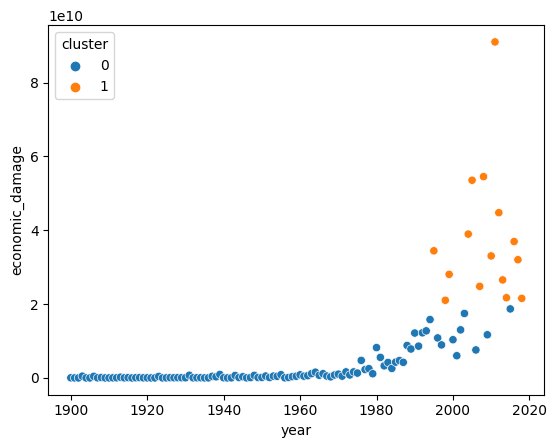

In [ ]:
#Visualisasi hasil modelling
sns.scatterplot(data=df_resample, x='year', y='economic_damage',
                hue='cluster')

Dapat dilihat persebaran data economic_damage pertahun semakin meningkat yang didominasi oleh cluster 1, dan terdapat outlier

<Axes: xlabel='year', ylabel='reported_disaster'>

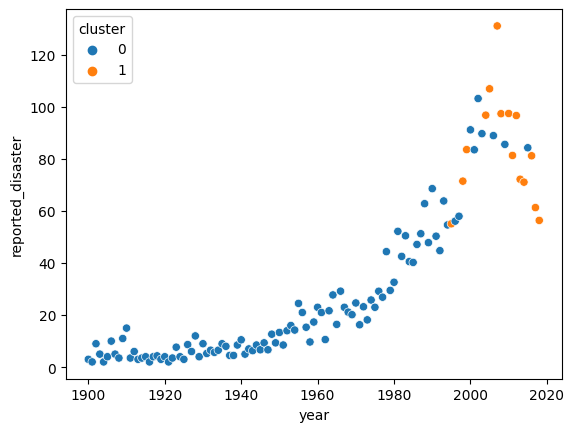

In [ ]:
#Visualisasi hasil modelling
sns.scatterplot(data=df_resample, x='year', y='reported_disaster',
                hue='cluster')

Dapat dilihat persebaran data reported disaster pertahun semakin meningkat yang didominasi oleh cluster 1, dan terdapat outlier.

<Axes: xlabel='reported_disaster', ylabel='economic_damage'>

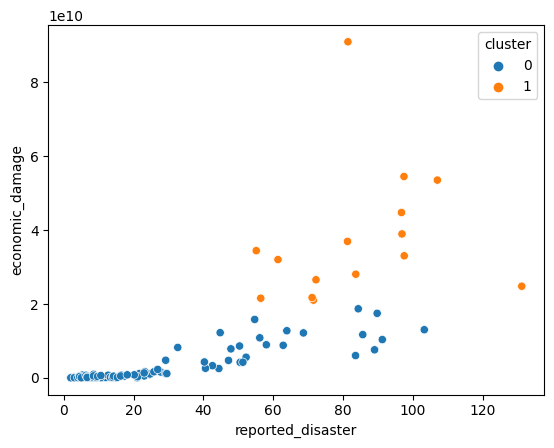

In [ ]:
#Visualisasi hasil modelling
sns.scatterplot(data=df_resample, x='reported_disaster', y='economic_damage',
                hue='cluster')

Korelasi Cluster 0 dan 1, antara reported disaster dan economic damage adalah lemah, serta terdapat outlier pada cluster 1.